# Modelagem | Sprint 3

O processo de modelagem foi longo e com diversas reviravoltas. Iniciamos com três hipóteses de features oriundas da Sprint 2, algumas ideias de algoritmos e vagas suposições sobre quais métricas utilizar. 

Ao final, tínhamos testado mais de 70 modelos, selecionado quais algoritmos tendiam a performar melhor com nosso dataset e entendido profundamente como cada métrica funcionava e flutuava perante mudanças de feature ou parâmetro. Assim, esse processo todo se deu em cinco rodadas de experimentação, cada uma rendendo novos insights e direcionando (ou redirecionando) nosso planejamento. Cada rodada é detalhada tecnicamente neste notebook.


## Rodada 1

Nossa primeira rodada teve como objetivo inicial testar as features escolhidas na Sprint 2 (hora de início, dia da semana, mês e categoria cardinal, tendo o “Total Domicílios | Rat%” da Rede Gazeta como saída) no algoritmo de regressão linear. Já no que tange a métricas, começamos analisando, nessa ordem de importância, R², R² ajustado, erro médio percentual, erro médio absoluto.

No entanto, antes de aplicar o algoritmo, foi necessário rever a preparação de dados para atingir as features desejadas. Afinal, na Sprint 2, as versões finais de feature engineering haviam se segmentado em três hipótese, nenhuma das quais se enquadravam perfeitamente na abordagem que buscávamos para esse primeiro modelo. Em particular, seguindo recomendações de padronização do orientador de turma, decidimos periodizar a coluna de "Hora Início" de 15 em 15 minutos.


### Preparando features

Para preparar os dados, tomamos como ponto de início a planilha da TV Gazeta presente na pasta 7 dos [documentos da Sprint 2](https://drive.google.com/drive/folders/1s8obHq_dfKkar6zOHj-unaX4aPyHathx?usp=sharing). 

Escolhemos essa versão da planilha porque ela foi a última iteração de pré-processamento geral antes de começarmos a segmentação de features por hipóteses. Logo, ela otimizava o esforço já investido em preparar os dados, mas ainda nos dava a oportunidade de testar novas abordagens em certas features.

Nesse contexto, copiamos essa planilha, denominada "emissora.csv", para a subpasta "arquivos_fonte" no diretório em que este notebook se encontra. Fizemos isso apenas para os dados da TV Gazeta, pois decidimos nos focar nos parceiro nesta sprint para maximizar recursos.

Assim, determinamos como features desejadas a hora de início (de 15 em 15m, dia da semana, mês e categoria). Começamos importando as bibliotecas e visualizando os dados tal qual estão nesta primeira etapa.

In [2]:
# Importando as bibliotecas necessárias para todo o notebook
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Abre planilha 
df = pd.read_csv('/content/drive/MyDrive/Sprint 3/arquivos_fonte/emissora.csv')
# Mostra os dados de forma estilizada
display(df)

,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,4-11 anos | Rat%,12-17 anos | Rat%,18-24 anos | Rat%,25-34 anos | Rat%,35-49 anos | Rat%,50-59 anos | Rat%,60+ anos | Rat%,Programa,Categoria,Mês
0,2020-06-01,06:00:00,1,4.27,2.40,0.31,0.82,5.23,1.65,2.35,0.0,0.00,0.00,3.19,1.98,5.81,1.61,PROGRAMA 28,JORNALISMO,6
1,2020-06-01,06:05:00,1,4.89,3.02,0.51,1.08,5.23,1.89,2.75,0.0,0.00,0.00,3.19,2.86,5.81,2.38,PROGRAMA 28,JORNALISMO,6
2,2020-06-01,06:10:00,1,5.74,3.13,1.53,1.22,5.23,1.97,3.24,0.0,1.22,0.00,3.19,3.52,5.81,2.62,PROGRAMA 28,JORNALISMO,6
3,2020-06-01,06:15:00,1,6.55,3.06,1.86,1.48,6.46,1.92,3.92,0.0,1.52,0.00,3.19,4.05,6.65,3.10,PROGRAMA 28,JORNALISMO,6
4,2020-06-01,06:20:00,1,7.27,3.49,2.18,1.48,6.46,2.23,4.05,0.0,1.52,0.00,3.19,4.82,6.90,3.10,PROGRAMA 28,JORNALISMO,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218846,2022-06-30,29:35:00,4,1.67,0.30,0.41,1.03,0.53,0.17,0.92,0.0,0.96,0.25,0.00,1.41,0.00,0.71,PROGRAMA 136,JORNALISMO,6
218847,2022-06-30,29:40:00,4,1.97,0.30,0.41,1.45,0.35,0.17,1.07,0.0,0.96,1.25,0.00,1.41,0.00,0.47,PROGRAMA 136,JORNALISMO,6
218848,2022-06-30,29:45:00,4,2.22,0.30,0.41,1.45,0.88,0.17,1.26,0.0,0.96,1.25,0.00,1.41,0.00,1.18,PROGRAMA 136,JORNALISMO,6
218849,2022-06-30,29:50:00,4,2.71,0.54,0.41,1.81,0.88,0.37,1.42,0.0,0.96,1.25,0.00,1.74,0.00,1.88,PROGRAMA 136,JORNALISMO,6


Dessa maneira, vê-se que as features desejadas estão presentes, porém nem todas estão formatadas corretamente. O campo "Hora Início", por exemplo, apresenta strings de 5m em 5m, enquanto a coluna de "Categoria" ainda precisa ser transformada em tipo numérico. 

Seguindo conclusões do feature engineering na Sprint 2, decidimos substituir as strings de horário pelo quarto de hora, em decimal, ao qual pertencem. Nesse sentido, "09:05:00", por exemplo, torna-se 9; "09:20:00", 9.25 (segundo quarto de hora, das 9h15 às 9h30); "09:35:00", 9.5; e "09:50:00", 9.75.

In [4]:
# CÉLULA PARA FORMATAR HORÁRIOS EM DECIMAIS DE 15 EM 15m

# Recebe array de todas as strings únicas de horário
hours = df['Hora Início'].unique()
# Cria dicionário que guardará as associações de cada string com seu respectivo decimal
timemap = {}

# Esta função transforma strings de horário em seu decimal de 15 em 15m
def string_to_decimal(hour):

  # Nos dados da TV Gazeta, a unidade das horas começa em 6 e vai até 29. Assim, 
  # para os horários de 6 a 23, podemos utilizar o método nativo to_datetime, que 
  # automaticamente transforma strings em objetos de data/tempo.
  # Checamos a unidade de hora acessando os primeiros dois caracteres das string
  # e transformando-os em inteiros.
  if int(hour[:2]) <= 23:
    
    # Isola minutos da string de hora através da transformação em objeto datetime
    minute = pd.to_datetime(hour).minute

    # Os quartos de hora têm como limites superiores 15, 30, 45 e 60. Nesse último,
    # como as strings originais estão divididas de 5 em 5m, o limite pode ser considerado
    # 55. Assim, checamos em qual quarto os minutos do horário em questão se encontram
    # e retornamos a unidade de hora somada às casas decimais associadas ao quarto.
    if minute < 15:
      return int(hour[:2])
    elif minute < 30:
      return int(hour[:2]) + 0.25
    elif minute < 45:
      return int(hour[:2]) + 0.5
    elif minute <= 55:
      return int(hour[:2]) + 0.75

  # Para horários de 24 a 29, calculamos o horário relativo (hora_da_string - 24),
  # de modo que 24 torna-se 0, 29 torna-se 5, etc. Isso completa o ciclo, pois
  # após o 29 o horário reinicia em 6. Fazendo isso, podemos transformar a string
  # em objeto e trabalhar com os atributos de minutos. Depois, só somamos as casas
  # decimais à unidade de hora original.
  else:
    # Cria hora relativa substituindo os primeiros dois caracteres da hora original
    # pelo seu valor em inteiro menos 24. O resultado é substituído como string.
    # O argumento '1' indica quantas ocorrências devem ser substituídas; no caso, 
    # como estamos alterando apenas a unidade de horas, a substituição é unitária.
    auxiliary_hour = hour.replace(hour[:2], "0" + str(int(hour[:2]) - 24), 1)

    # Isolamos os minutos da hora relativa (auxiliar)
    auxiliary_minutes = pd.to_datetime(auxiliary_hour).minute

    # O mesmo processo do if anterior é aplicada para calcular as casas decimais.
    # A diferença é que, ao retornar valores, somamos os decimais da hora relativa 
    # com o inteiro de hora do horário original.
    if auxiliary_minutes < 15:
      return int(hour[:2])
    elif auxiliary_minutes < 30:
      return int(hour[:2]) + 0.25
    elif auxiliary_minutes < 45:
      return int(hour[:2]) + 0.5
    elif auxiliary_minutes <= 55:
      return int(hour[:2]) + 0.75

# Este loop passa cada hora no array de strings únicas para a função de
# transformação em decimais e salva o resultado dicionário, mantendo as strings
# como chaves e os decimais como valores associados.
for hour in hours:
  timemap[hour] = string_to_decimal(hour)

# O método replace substituti todos os itens da coluna "Hora Início" presentes
# nas chaves do dicionário timemap pelos seus respectivos valores
df = df.replace({"Hora Início": timemap})

# Define colunas a serem simplificadas para sua média a cada 15m (colunas de audiência)
columns = ['Total Domicílios | Rat%', 'AB | Rat%', 'C1 | Rat%', 'C2 | Rat%',
       'DE | Rat%', 'Masculino | Rat%', 'Feminino | Rat%', '4-11 anos | Rat%',
       '12-17 anos | Rat%', '18-24 anos | Rat%', '25-34 anos | Rat%',
       '35-49 anos | Rat%', '50-59 anos | Rat%', '60+ anos | Rat%']

# Substitui os valores de células com a mesma data e hora de início pela média do
# quarto que elas estão inseridas
df[columns] = df.groupby(['Data', 'Hora Início'])[columns].transform('mean')

# Deleta duplicatas para reduzir as linhas. Todas as colunas do array 'columns'
# repetem nos mesmos lugares após o último passo. Assim, escolhemos uma delas para
# ser usada como comparação de duplicatas. Qualquer outra do array funcionaria.
df = df.drop_duplicates(['Total Domicílios | Rat%'])

# Visualiza resultado
display(df)

,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,4-11 anos | Rat%,12-17 anos | Rat%,18-24 anos | Rat%,25-34 anos | Rat%,35-49 anos | Rat%,50-59 anos | Rat%,60+ anos | Rat%,Programa,Categoria,Mês
0,2020-06-01,6.00,1,4.966667,2.850000,0.783333,1.040000,5.230000,1.836667,2.780000,0.000000,0.406667,0.000000,3.190000,2.786667,5.810000,2.203333,PROGRAMA 28,JORNALISMO,6
3,2020-06-01,6.25,1,7.386667,3.690000,2.073333,1.653333,6.460000,2.290000,4.163333,0.000000,1.520000,0.000000,3.190000,4.643333,6.983333,3.900000,PROGRAMA 28,JORNALISMO,6
6,2020-06-01,6.50,1,7.473333,4.073333,2.010000,1.613333,5.556667,2.580000,3.806667,0.000000,1.520000,0.000000,3.190000,5.156667,4.200000,5.266667,PROGRAMA 28,JORNALISMO,6
9,2020-06-01,6.75,1,8.416667,5.380000,1.660000,1.903333,5.230000,3.326667,3.866667,0.000000,1.520000,0.000000,3.710000,5.166667,3.930000,7.513333,PROGRAMA 28,JORNALISMO,6
12,2020-06-01,7.00,1,6.526667,3.993333,1.750000,0.533333,5.230000,2.470000,3.090000,0.000000,1.520000,0.000000,3.900000,3.776667,4.300000,3.700000,PROGRAMA 28,JORNALISMO,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218464,2022-06-29,21.75,3,24.070000,7.910000,5.753333,13.846667,13.916667,9.370000,10.863333,4.326667,4.670000,2.303333,12.693333,9.050000,16.993333,18.716667,PROGRAMA 182,NOVELA,6
218473,2022-06-29,22.50,3,23.756667,8.386667,5.440000,12.203333,13.066667,9.750000,9.570000,2.740000,5.870000,5.463333,8.603333,8.223333,17.130000,19.790000,PROGRAMA 182,NOVELA,6
218485,2022-06-29,23.50,3,6.516667,2.470000,0.000000,3.926667,3.340000,1.910000,3.066667,0.000000,4.190000,1.860000,0.000000,2.696667,6.116667,4.186667,PROGRAMA 232,ENTREVISTA,6
218752,2022-06-30,21.75,4,25.906667,9.583333,6.426667,13.603333,16.110000,8.990000,13.243333,1.720000,6.410000,6.620000,13.233333,11.703333,17.483333,18.306667,PROGRAMA 182,NOVELA,6


Feito isso, precisamos transformar as categorias em valores numéricos. Seguindo testes da Sprint 2, resolvemos aplicar one-hot encoding, pois não há ordem inerente nesses dados.

In [5]:
# Este método transforma os valores únicos de uma coluna em colunas individuais auxiliares,
# seguindo o modelo de one-hot encoding. O parâmetro "prefix" determina o prefixo de cada coluna.
dummies = pd.get_dummies(df['Categoria'], prefix='Categoria')

# Concatena colunas auxiliares com planilha existente
df = pd.concat([df, dummies], axis=1)

# Deleta coluna de categorias original
df.pop('Categoria')

# Mostra resultados
display(df)

,Data,Hora Início,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,Feminino | Rat%,...,Categoria_MUSICAL,Categoria_NOVELA,Categoria_POLITICO,Categoria_PREMIACAO,Categoria_REALITY SHOW,Categoria_RELIGIOSO,Categoria_REPORTAGEM,Categoria_RURAL,Categoria_SERIES,Categoria_SHOW
0,2020-06-01,6.00,1,4.966667,2.850000,0.783333,1.040000,5.230000,1.836667,2.780000,...,0,0,0,0,0,0,0,0,0,0
3,2020-06-01,6.25,1,7.386667,3.690000,2.073333,1.653333,6.460000,2.290000,4.163333,...,0,0,0,0,0,0,0,0,0,0
6,2020-06-01,6.50,1,7.473333,4.073333,2.010000,1.613333,5.556667,2.580000,3.806667,...,0,0,0,0,0,0,0,0,0,0
9,2020-06-01,6.75,1,8.416667,5.380000,1.660000,1.903333,5.230000,3.326667,3.866667,...,0,0,0,0,0,0,0,0,0,0
12,2020-06-01,7.00,1,6.526667,3.993333,1.750000,0.533333,5.230000,2.470000,3.090000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218464,2022-06-29,21.75,3,24.070000,7.910000,5.753333,13.846667,13.916667,9.370000,10.863333,...,0,1,0,0,0,0,0,0,0,0
218473,2022-06-29,22.50,3,23.756667,8.386667,5.440000,12.203333,13.066667,9.750000,9.570000,...,0,1,0,0,0,0,0,0,0,0
218485,2022-06-29,23.50,3,6.516667,2.470000,0.000000,3.926667,3.340000,1.910000,3.066667,...,0,0,0,0,0,0,0,0,0,0
218752,2022-06-30,21.75,4,25.906667,9.583333,6.426667,13.603333,16.110000,8.990000,13.243333,...,0,1,0,0,0,0,0,0,0,0


Com isso, ficamos com todas as features desejadas e podemos começar a testar modelos. Para fins de reprodução, a partir de agora utilizamos o comando "!gdown" para acessar as planilhas geradas. Assim, usuários que não têm o login do Drive do Jupyters poderão rodar este Colab normalmente. Nesse sentido, primeiro salvamos as planilhas com os dados preparados:

In [6]:
df.to_csv('/content/drive/MyDrive/Sprint 3/prepared_data.csv')

Depois, baixamos a planilha no Colab com o gdown e a salvamos na variável 'df'.

In [7]:
!gdown '1k0GWwvmeAmdaERpGMcnRWUQ1-63sBpGp'
df = pd.read_csv('prepared_data.csv')

Downloading...
From: https://drive.google.com/uc?id=1k0GWwvmeAmdaERpGMcnRWUQ1-63sBpGp
To: /content/prepared_data.csv
100% 3.05M/3.05M [00:00<00:00, 220MB/s]


### Modelos de regressão linear

Para aplicar modelos, precisamos dividir os dados em conjuntos de treinamento e teste. No entanto, como queremos testar diferentes abordagens, tomamos o cuidado de sempre modificar cópias do dataframe (variável "df") oriundo da última etapa, para que essa versão original seja preservada.

Dito isso, neste primeiro experimento, pretendemos fazer uma regressão simples com os dados da forma como estão.

#### Dados simples

In [ ]:
# Importa métodos para separar dataset em treino e teste
from sklearn.model_selection import train_test_split

df_copy = df.copy() # Cria cópia da dataframe original

# Dividindo x e y
y = df_copy['Total Domicílios | Rat%'].values # Score de audiência

x = df_copy[['Hora Início', 'Dia da Semana', 'Mês', 'Categoria_AUDITORIO', 
        'Categoria_CARROS E MOTORES', 'Categoria_DEBATE', 'Categoria_DOCUMENTARIO', 
        'Categoria_EDUCATIVO', 'Categoria_ENTREVISTA',
       'Categoria_ESPORTE', 'Categoria_FEMININO', 'Categoria_FILME',
       'Categoria_FUTEBOL', 'Categoria_GAME SHOW', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MINISSERIE', 'Categoria_MUSICAL',
       'Categoria_NOVELA', 'Categoria_POLITICO', 'Categoria_PREMIACAO',
       'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM',
       'Categoria_RURAL', 'Categoria_SERIES', 'Categoria_SHOW']].values # Features de data, hora e categoria

# Dividindo dados para treino e dados para teste, reservando 70% dos dados para treino
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

Com os conjuntos de treino e teste separados, podemos aplicar a regressão.

In [ ]:
# Importa métodos para fazer regressão linear
from sklearn.linear_model import LinearRegression

# Treinando o modelo
simple_regression = LinearRegression().fit(x_train, y_train)

# Testando o modelo
y_pred = simple_regression.predict(x_test)

Para avaliar os resultados, consideramos as métricas citadas anteriormente. Dessas, todas exceto o erro percentual podem ser calculadas por métodos nativos do sklearn. No caso do erro percentual, fizemos o cálculo em Python através da divisão do erro médio absoluto pela média de predições. Essa é, claramente, uma métrica imperfeita, pois não calcula a média de cada erro dividido pelo valor real associado a ele, e sim a média dos erros dividida pelas médias dos valores reais. Apesar disso, é uma maneira de entender, mais intuitivamente, o que o erro representa na escala do dataset, de modo que consideramos relevante utilizá-lo.

Exibimos também os coeficientes do modelo como fator de explicabilidade.

In [ ]:
# Importa métodos para avaliar resultados
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Erro médio absoluto
mean_absolute = mean_absolute_error(y_test, y_pred)
print("Erro médio: " + str(mean_absolute))

# Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
# decimais para facilitar a visualização
percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
print("Erro médio percentual: " + percentual_error + "%")

# R²
r2 = r2_score(y_test, y_pred)
print("R²: " + str(r2))

# R² ajustado
r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print("R² ajustado: " + str(r2))

print("\nCoeficientes\n" + str(simple_regression.coef_)) # Exibe os coeficientes


Erro médio: 5.063221162450242
Erro médio percentual: 35.21%
R²: 0.4722920738828278
R² ajustado: 0.4722920738828278

Coeficientes
[-3.48999439e-02 -2.65030766e-01 -2.24553056e-01 -2.08330178e+00
 -3.61846132e+00 -1.77635684e-15 -7.31398410e-01 -8.94716855e+00
 -7.33564331e+00 -1.37187653e+00 -6.66384998e+00 -3.45155059e+00
  9.74239274e+00 -2.62269350e+00 -1.12392604e+00  1.02281397e+00
  5.21290395e-01 -1.16039505e+00  1.06321275e+01  7.07322854e+00
  5.93379606e+00  8.94976760e+00 -6.30103736e+00  1.66394665e+00
 -2.60401914e+00  1.67569868e+00  8.00259422e-01]


Analisando o R², vemos que esse modelo só explica cerca de 47% dos dados disponíveis.

#### Normalização

Uma técnica frequentemente útil em machine learning é a normalização dos dados, que força todos os valores a uma escala de 0 a 1. Isso evita que discrepâncias de escala entre colunas prejudiquem as predições. Assim, dado que nossos campos têm certa variação de escala (0 e 1 para categorias; 1 a aproximadamente 45 para audiência, por exemplo), supomos que a normalização poderia nos ajudar a melhorar nossas métricas.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing # Método necessário para normalizar

df_copy = df.copy() # Faz uma cópia da dataframe original para que ela possa ser utilizada em outros modelos

# Seleciona as colunas a serem normalizadas
df_desired = df_copy[['Hora Início', 'Dia da Semana', 'Mês', 'Categoria_AUDITORIO', 
        'Categoria_CARROS E MOTORES', 'Categoria_DEBATE', 'Categoria_DOCUMENTARIO', 
        'Categoria_EDUCATIVO', 'Categoria_ENTREVISTA',
       'Categoria_ESPORTE', 'Categoria_FEMININO', 'Categoria_FILME',
       'Categoria_FUTEBOL', 'Categoria_GAME SHOW', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MINISSERIE', 'Categoria_MUSICAL',
       'Categoria_NOVELA', 'Categoria_POLITICO', 'Categoria_PREMIACAO',
       'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM',
       'Categoria_RURAL', 'Categoria_SERIES', 'Categoria_SHOW', 'Total Domicílios | Rat%']]

# Normaliza os valores (intervalo de 0 a 1)
min_max_scaler = preprocessing.MinMaxScaler() # Cria objeto de normalização
df_normalized = min_max_scaler.fit_transform(df_desired) # Normaliza
df_normalized = pd.DataFrame(df_normalized) # Transforma objeto normalizado em dataframe Pandas

# Dividindo x e y

y = df_normalized.pop(27) # Remove score de audiência de df e o salva em y
x = df_normalized # Salva as outras colunas como entradas em x

# Dividindo dados para treino e dados para teste, reservando 70% dos dados para treino
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [ ]:
# Importa métodos para fazer regressão linear
from sklearn.linear_model import LinearRegression

# Treinando o modelo
normalized_regression = LinearRegression().fit(x_train, y_train)

# Testando o modelo
y_pred = normalized_regression.predict(x_test)

In [ ]:
# Importa métodos para avaliar resultados
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Erro médio absoluto
mean_absolute = mean_absolute_error(y_test, y_pred)
print("Erro médio: " + str(mean_absolute))

# Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
# decimais para facilitar a visualização
percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
print("Erro médio percentual: " + percentual_error + "%")

# R²
r2 = r2_score(y_test, y_pred)
print("R²: " + str(r2))

# R² ajustado
r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print("R² ajustado: " + str(r2))

print("\nCoeficientes\n" + str(simple_regression.coef_)) # Exibe os coeficientes


Erro médio: 0.11222507194200755
Erro médio percentual: 35.21%
R²: 0.47229207388282823
R² ajustado: 0.47229207388282823

Coeficientes
[-3.48999439e-02 -2.65030766e-01 -2.24553056e-01 -2.08330178e+00
 -3.61846132e+00 -1.77635684e-15 -7.31398410e-01 -8.94716855e+00
 -7.33564331e+00 -1.37187653e+00 -6.66384998e+00 -3.45155059e+00
  9.74239274e+00 -2.62269350e+00 -1.12392604e+00  1.02281397e+00
  5.21290395e-01 -1.16039505e+00  1.06321275e+01  7.07322854e+00
  5.93379606e+00  8.94976760e+00 -6.30103736e+00  1.66394665e+00
 -2.60401914e+00  1.67569868e+00  8.00259422e-01]


#### Padronização

In [ ]:
# Importa métodos para separar dataset em treino e teste
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df_copy = df.copy()

df_desired = df_copy[['Hora Início', 'Dia da Semana', 'Mês', 'Categoria_AUDITORIO', 'Categoria_CARROS E MOTORES', 'Categoria_DEBATE',
       'Categoria_DOCUMENTARIO', 'Categoria_EDUCATIVO', 'Categoria_ENTREVISTA',
       'Categoria_ESPORTE', 'Categoria_FEMININO', 'Categoria_FILME',
       'Categoria_FUTEBOL', 'Categoria_GAME SHOW', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MINISSERIE', 'Categoria_MUSICAL',
       'Categoria_NOVELA', 'Categoria_POLITICO', 'Categoria_PREMIACAO',
       'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM',
       'Categoria_RURAL', 'Categoria_SERIES', 'Categoria_SHOW', 'Total Domicílios | Rat%']]

standard_scaler = preprocessing.StandardScaler()
df_standardized = standard_scaler.fit_transform(df_desired)
df_standardized = pd.DataFrame(df_standardized)


# Dividindo x e y
y = df_standardized.pop(27) # Features de data, hora e categoria
x = df_standardized # Score de audiência

# Dividindo dados para treino e dados para teste, reservando 70% dos dados para treino
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [ ]:
# Importa métodos para fazer regressão linear
from sklearn.linear_model import LinearRegression

# Treinando o modelo
standardized_regression = LinearRegression().fit(x_train, y_train)

# Testando o modelo
y_pred = standardized_regression.predict(x_test)

In [ ]:
# Importa métodos para avaliar resultados
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Erro médio absoluto
mean_absolute = mean_absolute_error(y_test, y_pred)
print("Erro médio: " + str(mean_absolute))

# Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
# decimais para facilitar a visualização
percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
print("Erro médio percentual: " + percentual_error + "%")

# R²
r2 = r2_score(y_test, y_pred)
print("R²: " + str(r2))

# R² ajustado
r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print("R² ajustado: " + str(r2))

print("\nCoeficientes\n" + str(simple_regression.coef_)) # Exibe coeficientes


Erro médio: 248378030.81966096
Erro médio percentual: 1025686006282.49%
R²: -2.0044504114610543e+20
R² ajustado: -2.0044504114610543e+20

Coeficientes
[-3.48999439e-02 -2.65030766e-01 -2.24553056e-01 -2.08330178e+00
 -3.61846132e+00 -1.77635684e-15 -7.31398410e-01 -8.94716855e+00
 -7.33564331e+00 -1.37187653e+00 -6.66384998e+00 -3.45155059e+00
  9.74239274e+00 -2.62269350e+00 -1.12392604e+00  1.02281397e+00
  5.21290395e-01 -1.16039505e+00  1.06321275e+01  7.07322854e+00
  5.93379606e+00  8.94976760e+00 -6.30103736e+00  1.66394665e+00
 -2.60401914e+00  1.67569868e+00  8.00259422e-01]


## Rodada 2

Nossa segunda rodada teve como objetivo testar as mesmas features (hora de início, dia da semana, mês e categoria cardinal, tendo o “Total Domicílios | Rat%” da Rede Gazeta como saída) no algoritmos de KNN, árvore decisória e random forest.

### KNN (K-Nearest Neighbor)



O algoritmo KNN (K-Nearest Neighbors) é um algoritmo de aprendizado supervisionado não paramétrico, que usa a proximidade de um ponto com seus vizinhos para fazer previsões. Desse modo, a escolha do modelo KNN se deve a sua natureza de comparar diretamente os valores independentes com os seus vizinhos mais próximos, o que, por vezes, pode performar melhor do que modelos de regressão linear.

Iniciamos essa etapa utilizando as features originais, sem normalização ou padronização.

#### Features originais

In [ ]:
df_copy = df.copy() # Copia dataframe

y = df_copy['Total Domicílios | Rat%'].values # Score de audiência
x = df_copy[['Hora Início', 'Dia da Semana', 'Mês', 'Categoria_AUDITORIO', 
        'Categoria_CARROS E MOTORES', 'Categoria_DEBATE', 'Categoria_DOCUMENTARIO', 
        'Categoria_EDUCATIVO', 'Categoria_ENTREVISTA',
       'Categoria_ESPORTE', 'Categoria_FEMININO', 'Categoria_FILME',
       'Categoria_FUTEBOL', 'Categoria_GAME SHOW', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MINISSERIE', 'Categoria_MUSICAL',
       'Categoria_NOVELA', 'Categoria_POLITICO', 'Categoria_PREMIACAO',
       'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM',
       'Categoria_RURAL', 'Categoria_SERIES', 'Categoria_SHOW']].values # Features de data, hora e categoria

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Esta função aplica o algoritmo de KNN para k vizinhos e mostra as métricas associadas.
# Criamos esta função para não ficar repetindo esse trecho de código nesta subseção do Colab.
def evaluate_knn(k):
  knn = KNeighborsRegressor(n_neighbors=k) # Cria objeto de KNN com k (argumento) vizinhos
  knn.fit( x_train, y_train.squeeze()) # Treina modelo
  y_pred = knn.predict(x_test) # Testa modelo

  # Erro médio absolutoa
  mean_absolute = mean_absolute_error(y_test, y_pred)
  print("Erro médio: " + str(mean_absolute))

  # Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
  # decimais para facilitar a visualização
  percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
  print("Erro médio percentual: " + percentual_error + "%")

  # R²
  r2 = r2_score(y_test, y_pred)
  print("R²: " + str(r2))

  # R² ajustado
  r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
  print("R² ajustado: " + str(r2))


Nesse contexto, resolvemos aplicar este algoritmo ao dataframe considerando vários números de vizinhos. Começamos 2 e 3 e vimos que as métricas melhoraram com o acréscimo de vizinhos. A partir daí, testamos ímpares crescentes até que o R² parasse de subir. Escolhemos apenas ímpares porque a literatura indicava que eles tendem a performar melhor com esse algoritmo. Assim, obtivemos o número de vizinhos ideal por tentativa de erro.

In [ ]:
evaluate_knn(2)

Erro médio: 2.2127987847745305
Erro médio percentual: 15.39%
R²: 0.8731274463543462
R² ajustado: 0.8731274463543462


In [ ]:
evaluate_knn(3)

Erro médio: 2.0993115396203677
Erro médio percentual: 14.6%
R²: 0.8843116748839566
R² ajustado: 0.8843116748839566


In [ ]:
evaluate_knn(5)

Erro médio: 2.041335241538616
Erro médio percentual: 14.19%
R²: 0.8899105209974141
R² ajustado: 0.8899105209974141


In [ ]:
evaluate_knn(7)

Erro médio: 2.040835521313075
Erro médio percentual: 14.19%
R²: 0.8891245924911518
R² ajustado: 0.8891245924911518


In [ ]:
evaluate_knn(9)

Erro médio: 2.0652401437291465
Erro médio percentual: 14.36%
R²: 0.8860147743061687
R² ajustado: 0.8860147743061687


In [ ]:
evaluate_knn(11)

Erro médio: 2.0782107608169675
Erro médio percentual: 14.45%
R²: 0.8844572548118802
R² ajustado: 0.8844572548118802


Com esse número de features, o tempo de execução dos métodos de KNN foi bem curto, não passando de alguns segundos. Isso faz de esse algoritmo eficiente para as features atuais.

Ademais, tivemos métricas muito positivas. Analisando com mais profundidade, percebemos que o erro médio cai rapidamente do segundo ao quinto vizinho, atingindo seu ápice em k = 7. Daí em diante, no entanto, o R² começa a cair e o erro volta a subir. 

#### Normalização
Quisemos, também, avaliar a influência da normalização nesse processo. Ignoramos a padronização porque já sabíamos, da rodada 1, que essa técnica tende a distorcer as colunas cardinais. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing # Método necessário para normalizar

df_copy = df.copy() # Faz uma cópia da dataframe original para que ela possa ser utilizada em outros modelos

# Seleciona as colunas a serem normalizadas
df_desired = df_copy[['Hora Início', 'Dia da Semana', 'Mês', 'Categoria_AUDITORIO', 
        'Categoria_CARROS E MOTORES', 'Categoria_DEBATE', 'Categoria_DOCUMENTARIO', 
        'Categoria_EDUCATIVO', 'Categoria_ENTREVISTA',
       'Categoria_ESPORTE', 'Categoria_FEMININO', 'Categoria_FILME',
       'Categoria_FUTEBOL', 'Categoria_GAME SHOW', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MINISSERIE', 'Categoria_MUSICAL',
       'Categoria_NOVELA', 'Categoria_POLITICO', 'Categoria_PREMIACAO',
       'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM',
       'Categoria_RURAL', 'Categoria_SERIES', 'Categoria_SHOW', 'Total Domicílios | Rat%']]

# Normaliza os valores (intervalo de 0 a 1)
min_max_scaler = preprocessing.MinMaxScaler() # Cria objeto de normalização
df_normalized = min_max_scaler.fit_transform(df_desired) # Normaliza
df_normalized = pd.DataFrame(df_normalized) # Transforma objeto normalizado em dataframe Pandas

# Dividindo x e y

y = df_normalized.pop(27) # Remove score de audiência de df e o salva em y
x = df_normalized # Salva as outras colunas como entradas em x

# Dividindo dados para treino e dados para teste, reservando 70% dos dados para treino
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

Experimentamos valores semelhantes para o número de vizinhos a fim de comparar essas instâncias com as não normalizadas. Em particular, queríamos saber se o valor ótimo (k = 7 anteriormente) mudaria.

In [ ]:
evaluate_knn(2)

Erro médio: 0.04957258769042309
Erro médio percentual: 15.55%
R²: 0.867808873505403
R² ajustado: 0.867808873505403


In [ ]:
evaluate_knn(3)

Erro médio: 0.04772620903056398
Erro médio percentual: 14.97%
R²: 0.878753581954773
R² ajustado: 0.878753581954773


In [ ]:
evaluate_knn(5)

Erro médio: 0.04658526603441716
Erro médio percentual: 14.62%
R²: 0.8849486555678554
R² ajustado: 0.8849486555678554


In [ ]:
evaluate_knn(7)

Erro médio: 0.046632804557406766
Erro médio percentual: 14.63%
R²: 0.8861322061908479
R² ajustado: 0.8861322061908479


In [ ]:
evaluate_knn(9)

Erro médio: 0.04785548923046109
Erro médio percentual: 15.01%
R²: 0.8820795339502258
R² ajustado: 0.8820795339502258


In [ ]:
evaluate_knn(11)

Erro médio: 0.04963317413482603
Erro médio percentual: 15.57%
R²: 0.8733015932980688
R² ajustado: 0.8733015932980688


Na versão padronizada, k = 7 continua sendo o valor ótimo para vizinhos, porém, mesmo nele, o R² ainda é um pouco menor, e o erro é um pouco maior quando comparado ao R² não normalizado. Conclui-se, portanto, que a versão não normalizadatambém prejudica a performance do modelo no KNN.

### Decision Tree

As árvores decisórias são uma representação visual de todos os possíveis caminhos de ações que se pode seguir para tomar uma decisão, ou seja, trata-se de uma ferramental que estabelece regras e condições para se chegar em uma predição.

Nesse contexto, testamos o algoritmo de árvore decisória tanto com a profundidade automática do método quanto com valores refinados manualmente. Seguimos a abordagem de tentativa e erro mais uma vez, aumentando a profundidade enquanto as métricas melhoraram.


In [ ]:
df_copy = df.copy() # Cria cópia

y = df_copy['Total Domicílios | Rat%'].values # Score de audiência
x = df_copy[['Hora Início', 'Dia da Semana', 'Mês', 'Categoria_AUDITORIO', 
        'Categoria_CARROS E MOTORES', 'Categoria_DEBATE', 'Categoria_DOCUMENTARIO', 
        'Categoria_EDUCATIVO', 'Categoria_ENTREVISTA',
       'Categoria_ESPORTE', 'Categoria_FEMININO', 'Categoria_FILME',
       'Categoria_FUTEBOL', 'Categoria_GAME SHOW', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MINISSERIE', 'Categoria_MUSICAL',
       'Categoria_NOVELA', 'Categoria_POLITICO', 'Categoria_PREMIACAO',
       'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM',
       'Categoria_RURAL', 'Categoria_SERIES', 'Categoria_SHOW']].values # Features de data, hora e categoria

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

Assim como no KNN, criamos uma função à parte para modelar árvores com diferentes profundidades, já as associando aos seus erros.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def evaluate_dt(depth):
  # Cria objeto de decision tree com profundidade depth (argumento)
  dt = DecisionTreeRegressor(max_depth=depth) 
  dt.fit(x_train, y_train.squeeze()) # Cria decision tree com base em dados de treino
  y_pred = dt.predict(x_test) # Faz predições para dataset de test

  # Erro médio absoluto
  mean_absolute = mean_absolute_error(y_test, y_pred)
  print("Erro médio: " + str(mean_absolute))

  # Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
  # decimais para facilitar a visualização
  percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
  print("Erro médio percentual: " + percentual_error + "%")

  # R²
  r2 = r2_score(y_test, y_pred)
  print("R²: " + str(r2))

  # R² ajustado
  r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
  print("R² ajustado: " + str(r2))

No entanto, antes disso, queremos testar a versão automática. Para isso, criamos outro objeto de decision tree com argumentos vazios.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Objeto com argumentos vazios, para indicar profundidade automática
dt = DecisionTreeRegressor()
dt.fit( x_train, y_train.squeeze() ) # Treina modelo
y_pred = dt.predict(x_test) # Testa modelo


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Erro médio absoluto
mean_absolute = mean_absolute_error(y_test, y_pred)
print("Erro médio: " + str(mean_absolute))

# Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
# decimais para facilitar a visualização
percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
print("Erro médio percentual: " + percentual_error + "%")

# R²
r2 = r2_score(y_test, y_pred)
print("R²: " + str(r2))

# R² ajustado
r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print("R² ajustado: " + str(r2))


Erro médio: 2.39544011870089
Erro médio percentual: 16.66%
R²: 0.848367309227295
R² ajustado: 0.848367309227295


In [ ]:
evaluate_dt(2)

Erro médio: 3.76692670214708
Erro médio percentual: 26.19%
R²: 0.664155558074111
R² ajustado: 0.664155558074111


In [ ]:
evaluate_dt(3)

Erro médio: 3.329759893345118
Erro médio percentual: 23.15%
R²: 0.7210137045622871
R² ajustado: 0.7210137045622871


Os valores iniciais (com 2 e 3 de profundidade) são muito inferiores aos que vínhamos conseguindo nos últimos modelos. Porém, a melhora relativa entre eles nos incentivou a testar valores de profundidade mais altos, esperando, com isso, diminuir mais rapidamente o erro médio e aumentar o R².

In [ ]:
evaluate_dt(10)

Erro médio: 2.1271137718517457
Erro médio percentual: 14.79%
R²: 0.8753549805561605
R² ajustado: 0.8753549805561605


In [ ]:
evaluate_dt(12)

Erro médio: 2.0841460883095917
Erro médio percentual: 14.49%
R²: 0.8816323577185258
R² ajustado: 0.8816323577185258


In [ ]:
evaluate_dt(13)

Erro médio: 2.1213307049325842
Erro médio percentual: 14.75%
R²: 0.8763287313376618
R² ajustado: 0.8763287313376618


Encontramos, com isso, o ápice de performance na profundidade 12, superando a versão automática. Foi uma constatação curiosa; até então, acreditávamos ser muito difícil refinar para além da configuração automática. Aqui, descobrimos não só ser possível como encorajado, pois rapidamente conseguimos melhorar significativamente nosso modelo com um pouco de intervenção manual.

### Random forest generator

O algoritmo de random forest, em português, floresta aleatória, criar muitas árvores de decisão, de maneira aleatória, formando o que podemos enxergar como uma floresta. Assim, cada árvore é utilizada na escolha do resultado final, em uma espécie de votação. Isso garante maior equilíbrio nas predições, pois a maior amostra minimiza possíveis viéses.

Nesse contexto, testamos o algoritmo de floresta aleatória com diversos números de estimadores (isto é, número de árvores). Como feito anteriormente, aumentamos gradualmente os argumentos para, através de tentativa e erro, encontrar os valores ótimos. 

Como sempre, fizemos também uma função que calculasse os modelos e os erros para evitar repetições desnecessárias.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def evaluate_forest(estimators):
  # Cria objeto de floresta
  regressor = RandomForestRegressor(n_estimators=estimators, random_state=0)
  # Treina modelo
  regressor.fit(x_train, y_train)
  # Testa modelo
  y_pred = regressor.predict(x_test)

  # Erro médio absoluto
  mean_absolute = mean_absolute_error(y_test, y_pred)
  print("Erro médio: " + str(mean_absolute))

  # Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
  # decimais para facilitar a visualização
  percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
  print("Erro médio percentual: " + percentual_error + "%")

  # R²
  r2 = r2_score(y_test, y_pred)
  print("R²: " + str(r2))

  # R² ajustado
  r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
  print("R² ajustado: " + str(r2))

In [ ]:
evaluate_forest(20)

Erro médio: 2.105253526278549
Erro médio percentual: 14.64%
R²: 0.8846517417059605
R² ajustado: 0.8846517417059605


In [ ]:
evaluate_forest(100)

Erro médio: 2.10019891767052
Erro médio percentual: 14.6%
R²: 0.8846832941424568
R² ajustado: 0.8846832941424568


In [ ]:
evaluate_forest(200)

Erro médio: 2.100815732129745
Erro médio percentual: 14.61%
R²: 0.8841834707002605
R² ajustado: 0.8841834707002605


In [ ]:
evaluate_forest(800)

Erro médio: 2.0961493910422955
Erro médio percentual: 14.58%
R²: 0.8848536516427098
R² ajustado: 0.8848536516427098


In [ ]:
evaluate_forest(1600)

Erro médio: 2.0954377012320022
Erro médio percentual: 14.57%
R²: 0.8849557287021126
R² ajustado: 0.8849557287021126


In [ ]:
evaluate_forest(5000)

Erro médio: 2.0952422409624205
Erro médio percentual: 14.57%
R²: 0.8850830990502894
R² ajustado: 0.8850830990502894


Nesses modelos, tivemos, pela primeira vez, um caso evidente de rendimentos decrescentes. De 20 para 5000 estimadores, obtivemos uma melhora de apenas um milésimo no R² e 7 centésimos no erro percentual. No entanto, o tempo para computar o último modelo foi vinte vezes maior do que o tempo utilizado no primeiro.  Portanto, percebemos que não valeria a pena testar estimadores maiores, ainda que as métricas estivessem crescendo, pois esse crescimento seria muito baixo quando comparado aos recursos computacionais necessários para alcançá-lo.

## Rodada 3

Na rodada 2, já havíamos atingido resultados aceitáveis, chegando sempre a valores superiores a 80% no R². Entretanto, sob a recomendação dos TVCoders (Grupo 4), descobrimos que poderíamos melhorar ainda mais nossas métricas através da adição de mais features (rodada 3) e aplicação de algoritmos de Gradient Boosting (rodada 4).

Assim, voltamos aos nossos arquivos intermediários, da fase de feature engineering, e modificamos os códigos para que fossem preservadas as colunas de “Hora Início (15 em 15m)”, “Dia da Semana”, “Dia do Mês”, “Mês”, “Categoria”, “Feriado” e “BBB”. 


### Preparando features

A primeira etapa foi abrir a planilha original novamente, pois teríamos de alterar alguns passos tomados nas primeiras células deste notebook. 

Já a coluna “BBB” necessitou de algumas manipulações locais com as planilhas não anonimizadas. Isso se deu porque as versões pós-anonimização haviam substituído os títulos dos programas, nos quais apareciam a flag “BBB”, pela numeração padrão “PROGRAMA X”. 

Por isso, modificamos localmente nossos arquivos originais e produzimos um CSV simplificado que trazia apenas a coluna binária de BBB. Assim, foi possível concatenar esse arquivo com os outros já presentes no Drive da forma mais transparente possível e ainda preservar o sigilo contratual deste projeto.


In [ ]:
# Abre planilha original
df = pd.read_csv('/content/drive/MyDrive/Sprint 3/arquivos_fonte/emissora.csv')

In [ ]:
# Abre coluna de BBB
bbb = pd.read_csv("/content/drive/MyDrive/Sprint 3/arquivos_fonte/bbb.csv")

In [ ]:
# Adiciona coluna de BBB à df
df['BBB'] = bbb

In [ ]:
# Define função para separar o dia
def segregate_day(df):
  # Guarda datas da coluna 'Data' como objetos na variável 'dates'
  dates = pd.to_datetime(df['Data'])
  days = []
  # Este loop adiciona o dia de cada data em um array 'days'
  for date in dates:
    days.append(date.day)
  # Cria coluna 'Dia' com array 'days'
  df['Dia'] = days
  # Retorna df modificada
  return df

In [ ]:
# Executa segregação de dias
df = segregate_day(df)

A feature de feriado foi implementada utilizando a biblioteca “holiday” do Python, que já trazia uma lista datada de feriados brasileiros. Com isso, pudemos comparar os itens com as datas em nosso dataset e criar uma coluna binária indicando se certo programa fora televisionado em um feriado ou não.

In [ ]:
from datetime import date # Importa objeto de datas
import holidays # Importa biblioteca de feriados

holidays = holidays.Brazil() # Cria objeto de feriados brasileiros

# Esta função checa o valor de 'Data' de certa linha e, se ele estiver associado
# a um feriado do objeto 'holidays', retorna 1. Caso contrário, retorna 0.
def feriado(row): 
  if pd.to_datetime(row['Data']) in holidays:
    return 1
  return 0

# A função apply aplica a função "feriado" a todas as linhas da dataframe.
# O valor retornado é adicionado a uma nova coluna chamada "Feriado".
# Desse modo, datas de feriado ficam com 1 nessa coluna, enquanto as outras ficam
# com 0
df['Feriado'] = df.apply(lambda row: feriado(row), axis=1)

Como sempre, aplicamos o one-hot encoding nas categorias.

In [ ]:
# Este método transforma os valores únicos de uma coluna em colunas individuais auxiliares,
# seguindo o modelo de one-hot encoding. O parâmetro "prefix" determina o prefixo de cada coluna.
dummies = pd.get_dummies(df['Categoria'], prefix='Categoria')

# Concatena colunas auxiliares com planilha existente
df = pd.concat([df, dummies], axis=1)

# Deleta coluna de categorias original
df.pop('Categoria')

0         JORNALISMO
1         JORNALISMO
2         JORNALISMO
3         JORNALISMO
4         JORNALISMO
             ...    
218846    JORNALISMO
218847    JORNALISMO
218848    JORNALISMO
218849    JORNALISMO
218850    JORNALISMO
Name: Categoria, Length: 218851, dtype: object

Por fim, precisamos dividir os horários de início em uma coluna de hora e uma de minuto. 

In [ ]:
series = df['Hora Início'] # Isola coluna de horários
hours = [] # Inicia array para guardar unidades de hora
minutes = [] # Inicia array para guardar unidades de minuto

# Este loop passa por cada item da coluna de horário, acessa as unidades através
# dos indexes do valor em string, transforma em inteiro e salva no array
for time in series:
  hours.append(int(time[:2])) # A hora corresponde aos caracteres 0 e 1
  # O caractere 2 é ":" no formato "xx:xx:xx"
  minutes.append(int(time[3:5])) # O minuto corresponde aos caracteres 3 e 4

# Os arrays são adicionados como colunas na dataframe
df['Hora'] = hours
df['Minuto'] = minutes

Com essas features agregadas, tentamos, novamente, aplicar os algoritmos de KNN, decision tree e random forest. Ignoramos a regressão linear porque ela já tinha se provado pouco eficiente nas rodadas passadas. As métricas, contudo, permaneceram as mesmas: R², R² ajustado, erro médio percentual e erro médio absoluto.

### Regressão linear

In [ ]:
from sklearn.model_selection import train_test_split

model = df.copy() # Copia dataframe

# Dividindo x e y
y = model['Total Domicílios | Rat%'].values # Score de audiência
x = model[['Dia da Semana', 'BBB',
       'Mês', 'Dia', 'Hora', 'Minuto', 'Feriado', 'Categoria_AUDITORIO',
       'Categoria_CARROS E MOTORES', 'Categoria_EDUCATIVO',
       'Categoria_ENTREVISTA', 'Categoria_ESPORTE', 'Categoria_FEMININO',
       'Categoria_FILME', 'Categoria_FUTEBOL', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MUSICAL', 'Categoria_NOVELA',
       'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM',
       'Categoria_RURAL', 'Categoria_SERIES', 'Categoria_SHOW']].values # Features de data, hora e categoria

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

# Treinando o modelo
linear_regression = LinearRegression().fit(x_train, y_train)

# Testando o modelo
y_pred = linear_regression.predict(x_test)

# Avaliando testes
# Erro médio absoluto
mean_absolute = mean_absolute_error(y_test, y_pred)
print("Erro médio: " + str(mean_absolute))

# Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
# decimais para facilitar a visualização
percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
print("Erro médio percentual: " + percentual_error + "%")

# R²
r2 = r2_score(y_test, y_pred)
print("R²: " + str(r2))

# R² ajustado
r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print("R² ajustado: " + str(r2))

Erro médio: 3.833022223914597
Erro médio percentual: 38.67%
R²: 0.4155973645673756
R² ajustado: 0.4155973645673756


Mais uma vez, ficamos desapontados com a regressão linear. Mesmo sem normalização, o resultado foi inferior ao da Rodada 1. Comparado aos modelos da Rodada 2, é uma péssima performance. A partir daqui, decidimos nos focar em outros algoritmos para os próximos testes.

### KNN

Definimos a função novamente e seguimos a mesma lógica da Rodada 2 em testar diversos valores.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Esta função aplica o algoritmo de KNN para k vizinhos e mostra as métricas associadas.
# Criamos esta função para não ficar repetindo esse trecho de código nesta subseção do Colab.
def evaluate_knn(k):
  knn = KNeighborsRegressor(n_neighbors=k) # Cria objeto de KNN com k (argumento) vizinhos
  knn.fit( x_train, y_train.squeeze()) # Treina modelo
  y_pred = knn.predict(x_test) # Testa modelo

  # Erro médio absoluto
  mean_absolute = mean_absolute_error(y_test, y_pred)
  print("Erro médio: " + str(mean_absolute))

  # Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
  # decimais para facilitar a visualização
  percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
  print("Erro médio percentual: " + percentual_error + "%")

  # R²
  r2 = r2_score(y_test, y_pred)
  print("R²: " + str(r2))

  # R² ajustado
  r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
  print("R² ajustado: " + str(r2))

In [ ]:
evaluate_knn(2)

Erro médio: 2.2830145759717313
Erro médio percentual: 23.03%
R²: 0.7577304698122289
R² ajustado: 0.7577304698122289


In [ ]:
evaluate_knn(3)

Erro médio: 2.161453484830023
Erro médio percentual: 21.81%
R²: 0.7851972597619992
R² ajustado: 0.7851972597619992


In [ ]:
evaluate_knn(7)

Erro médio: 2.0839173440790963
Erro médio percentual: 21.02%
R²: 0.8035037793380517
R² ajustado: 0.8035037793380517


In [ ]:
evaluate_knn(9)

Erro médio: 2.0999127777100846
Erro médio percentual: 21.19%
R²: 0.8002665151256181
R² ajustado: 0.8002665151256181


Curiosamente, o aumento de features diminui o desempenho de modelos em KNN. Embora o pico ainda seja k = 7, o R² nesse ponto é de apenas 80% com 21% de erro, contra os 88% e 14%, respectivamente, da rodada 2. Nesse panorama, ficou claro que KNN também não era o melhor algoritmo para essas features.

### Decision tree

Assim como na rodada 2, para o algoritmo de árvore decisória, nós experimentamos tanto parâmetros (profundidade máxima) automáticos quanto manuais. 

In [ ]:
# Define função para profundidade customizada

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def evaluate_dt(depth):
  # Cria objeto de decision tree com profundidade depth (argumento)
  dt = DecisionTreeRegressor(max_depth=depth) 
  dt.fit(x_train, y_train.squeeze()) # Cria decision tree com base em dados de treino
  y_pred = dt.predict(x_test) # Faz predições para dataset de test

  # Erro médio absoluto
  mean_absolute = mean_absolute_error(y_test, y_pred)
  print("Erro médio: " + str(mean_absolute))

  # Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
  # decimais para facilitar a visualização
  percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
  print("Erro médio percentual: " + percentual_error + "%")

  # R²
  r2 = r2_score(y_test, y_pred)
  print("R²: " + str(r2))

  # R² ajustado
  r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
  print("R² ajustado: " + str(r2))

Após redefinir a função, como da última vez, testamos também o modelo automático.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Objeto com argumentos vazios, para indicar profundidade automática
dt = DecisionTreeRegressor()
dt.fit( x_train, y_train.squeeze() ) # Treina modelo
y_pred = dt.predict(x_test) # Testa modelo

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Erro médio absoluto
mean_absolute = mean_absolute_error(y_test, y_pred)
print("Erro médio: " + str(mean_absolute))

# Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
# decimais para facilitar a visualização
percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
print("Erro médio percentual: " + percentual_error + "%")

# R²
r2 = r2_score(y_test, y_pred)
print("R²: " + str(r2))

# R² ajustado
r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print("R² ajustado: " + str(r2))

Erro médio: 0.8965495918118679
Erro médio percentual: 9.05%
R²: 0.9406074700354196
R² ajustado: 0.9406074700354196


Surpreendente, conseguimos, dessa maneira, nosso melhor resultado até então. Com um erro de 0,9, já estávamos muito satisfeitos. Ademais, no começo da sprint, acreditávamos não ser possível passar de 0,5 no R²; agora, já chegamos a 0,94. Porém, ainda pairava a dúvida: é possível fazer mais? Por isso, começamos a testar mais argumentos.

In [ ]:
evaluate_dt(2)

Erro médio: 3.451649911146045
Erro médio percentual: 34.82%
R²: 0.47485939087072626
R² ajustado: 0.47485939087072626


In [ ]:
evaluate_dt(3)

Erro médio: 3.329759893345118
Erro médio percentual: 23.15%
R²: 0.7210137045622871
R² ajustado: 0.7210137045622871


In [ ]:
evaluate_dt(10)

Erro médio: 1.8681456671308865
Erro médio percentual: 18.85%
R²: 0.8407314902111465
R² ajustado: 0.8407314902111465


In [ ]:
evaluate_dt(20)

Erro médio: 2.375310503122583
Erro médio percentual: 16.52%
R²: 0.8531259873612317
R² ajustado: 0.8531259873612317


In [ ]:
evaluate_dt(25)

Erro médio: 0.9296756661867335
Erro médio percentual: 9.38%
R²: 0.9387509605956413
R² ajustado: 0.9387509605956413


In [ ]:
evaluate_dt(30)

Erro médio: 0.8979240607489479
Erro médio percentual: 9.06%
R²: 0.9406394164625264
R² ajustado: 0.9406394164625264


In [ ]:
best_tree = evaluate_dt(35)

Erro médio: 0.897226038167186
Erro médio percentual: 9.05%
R²: 0.9404847428922375
R² ajustado: 0.9404847428922375


In [ ]:
evaluate_dt(37)

Erro médio: 0.8985440782259045
Erro médio percentual: 9.07%
R²: 0.9404793410030493
R² ajustado: 0.9404793410030493


In [ ]:
evaluate_dt(40)

Erro médio: 0.896393475082247
Erro médio percentual: 9.04%
R²: 0.9406316407829963
R² ajustado: 0.9406316407829963


Com base nos resultados, vemos que foi necessário muito mais esforço computacional para melhorar as métricas desta vez, conforme nos aproximávamos do valor alcançado pelo método automatizado. De 2 a 20 de profundidade, a queda foi brusca, porém, a partir daí, tivemos de dobrar esse número para diminuir o erro percentual em 2 centésimos. De fato, conseguimos taxas finais menores do que as automáticas, porém o custo-benefício, considerando tempo, RAM e GPU, não parece ter valido a pena. Em grande escala, seria mais útil dedicar esse overhead de recursos em novos modelos, e não no refinamento exacerbado de um modelo que já estava bom.

### Random forest generator

Assim como na rodada 2, resolvemos testar vários argumentos para estimadores a fim de encontrar um valor ótimo. A suposição era de que esse algoritmo tivesse melhores resultados do que a decision tree, dado que ele tira a média de diversas árvores decisórias. Novamente, redefinimos a função.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def evaluate_forest(estimators):
  # Cria objeto de floresta
  regressor = RandomForestRegressor(n_estimators=estimators, random_state=0)
  # Treina modelo
  regressor.fit(x_train, y_train)
  # Testa modelo
  y_pred = regressor.predict(x_test)

  # Erro médio absoluto
  mean_absolute = mean_absolute_error(y_test, y_pred)
  print("Erro médio: " + str(mean_absolute))

  # Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
  # decimais para facilitar a visualização
  percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
  print("Erro médio percentual: " + percentual_error + "%")

  # R²
  r2 = r2_score(y_test, y_pred)
  print("R²: " + str(r2))

  # R² ajustado
  r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
  print("R² ajustado: " + str(r2))

In [ ]:
evaluate_forest(20)

Erro médio: 0.8974944331058854
Erro médio percentual: 9.05%
R²: 0.9569516976192453
R² ajustado: 0.9569516976192453


In [ ]:
evaluate_forest(100)

Erro médio: 0.8747982865236993
Erro médio percentual: 8.82%
R²: 0.9595642765366462
R² ajustado: 0.9595642765366462


In [ ]:
evaluate_forest(200)

Erro médio: 0.8721312286767394
Erro médio percentual: 8.79%
R²: 0.9598968867968866
R² ajustado: 0.9598968867968866


Como esperado, mesmo o modelo mais simples, com apenas 20 árvores (estimadores), trouxe um R² quase tão bom quanto a melhor decision tree. Aumentando os parâmetros, alcançamos novos recordes de erro médio percentual, chegando a 8,79%. O contraponto, todavia, é que cada tentativa levou muito mais tempo do que na Rodada 2 devido ao maior número de features. Mais que isso, tivemos que aumentar os estimadores em 10 vezes para conseguir 0,35 pontos percentuais a menos no erro. 

Assim, apesar de acreditar que poderíamos atingir resultados ainda melhores com esse algoritmo, resolvemos parar em 200 estimadores para maximizar recursos. Afinal, argumentos maiores tomariam muito mais tempo e renderiam melhorias mínimas, de modo que não valeria a pena.

## Rodada 4

Ainda seguindo as orientações dos TVCoders, decidimos aplicar as features da Rodada 3 em três algoritmos de Gradiente Boosting: Light GBM, Cat Boost e XGB. As métricas utilizadas foram as mesmas das rodadas anteriores, pois, assim como no caso do KNN e decision trees, os métodos de “score” de gradient boosters, quando aplicados a regressões, retornam o R² do modelo.


In [ ]:
from sklearn.model_selection import train_test_split

model = df.copy() # Copia dataframe

# Dividindo x e y
y = model['Total Domicílios | Rat%'].values # Score de audiência
x = model[['Dia da Semana', 'BBB',
       'Mês', 'Dia', 'Hora', 'Minuto', 'Feriado', 'Categoria_AUDITORIO',
       'Categoria_CARROS E MOTORES', 'Categoria_EDUCATIVO',
       'Categoria_ENTREVISTA', 'Categoria_ESPORTE', 'Categoria_FEMININO',
       'Categoria_FILME', 'Categoria_FUTEBOL', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MUSICAL', 'Categoria_NOVELA',
       'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM',
       'Categoria_RURAL', 'Categoria_SERIES', 'Categoria_SHOW']].values # Features de data, hora e categoria

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

### LightGBM

Começamos com o LightGBM utilizando os hiperparâmetros sugeridos pelo grupo 4. 

In [ ]:
hyper_params = {
    'task': 'train', #função
    'boosting_type': 'gbdt', #tipo da regressão
    'objective': 'regression', #tipo do modelo
    'metric': ['l1','l2'], #erro médio quadrático e erro médio absoluto
    'learning_rate': 0.08, #velocidade do aprendizado
    'feature_fraction': 1, #porcentagem do dataframe a ser utilizado
    'verbose': 0, #usado para retirar possíveis bugs existentes (debug)
    "max_depth": 8, #limita o tamanho de cada árvore
    "num_leaves": 128, #limita o número de folhas que cada árvore pode ter
    "num_iterations": 20_000 #quantidade de tentativas
}

In [ ]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor(**hyper_params) # Cria objeto de LightGBM

In [ ]:
# Treina modelo
gbm.fit(x_train, y_train,
        eval_set=[(x_test, y_test)],
        early_stopping_rounds=2_500)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Streaming output truncated to the last 5000 lines.
[15003]	valid_0's l1: 0.737925	valid_0's l2: 1.05593
[15004]	valid_0's l1: 0.737921	valid_0's l2: 1.05592
[15005]	valid_0's l1: 0.737913	valid_0's l2: 1.05591
[15006]	valid_0's l1: 0.737887	valid_0's l2: 1.05584
[15007]	valid_0's l1: 0.737882	valid_0's l2: 1.05582
[15008]	valid_0's l1: 0.737881	valid_0's l2: 1.05582
[15009]	valid_0's l1: 0.737877	valid_0's l2: 1.05582
[15010]	valid_0's l1: 0.737876	valid_0's l2: 1.05581
[15011]	valid_0's l1: 0.73788	valid_0's l2: 1.05581
[15012]	valid_0's l1: 0.737874	valid_0's l2: 1.05577
[15013]	valid_0's l1: 0.737863	valid_0's l2: 1.05575
[15014]	valid_0's l1: 0.73786	valid_0's l2: 1.05575
[15015]	valid_0's l1: 0.737851	valid_0's l2: 1.05573
[15016]	valid_0's l1: 0.737851	valid_0's l2: 1.05574
[15017]	valid_0's l1: 0.737839	valid_0's l2: 1.05571
[15018]	valid_0's l1: 0.737839	valid_0's l2: 1.0557
[15019]	valid_0's l1: 0.737841	valid_0's l2: 1.05572
[15020]	valid_0's l1: 0.737839	valid_0's l2: 1.0557

LGBMRegressor(feature_fraction=1, learning_rate=0.08, max_depth=8,
              metric=['l1', 'l2'], num_iterations=20000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [ ]:
y_pred = gbm.predict(x_test) # Testa modelo

In [ ]:
# Avaliação do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Erro médio absoluto
mean_absolute = mean_absolute_error(y_test, y_pred)
print("Erro médio: " + str(mean_absolute))

# Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
# decimais para facilitar a visualização
percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
print("Erro médio percentual: " + percentual_error + "%")

# R²
r2 = r2_score(y_test, y_pred)
print("R²: " + str(r2))

# R² ajustado
r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print("R² ajustado: " + str(r2))

Erro médio: 0.7241535827117884
Erro médio percentual: 7.31%
R²: 0.975951121438195
R² ajustado: 0.975951121438195


Indubitavelmente, este é o melhor modelo que desenvolvemos dentre todas as rodadas. Com cerca de 98% de R² e apenas 7% de erro, o LightGBM superou e muito nossas expectativas, reformulando o que pensávamos ser possível neste projeto. Entretanto, foi também o algoritmo mais demorado, levando em torno de 15 minutos para rodar completamente. Nesse sentido, assim que a execução terminou, fizemos questão de salvar o modelo final em .txt para que pudéssemos acessá-lo futuramente sem precisar aplicar todo o algoritmo mais uma vez.

In [ ]:
# Salva modelo em txt no Drive
gbm.booster_.save_model('/content/drive/MyDrive/Sprint 3/modelos/rat.txt')

Por curiosidade, tentamos implementar a representação gráfica de nosso modelo com LightGBM. O resultado pode ser visto abaixo. A resolução ainda é ruim porque está no Colab. Esperamos melhorar o tamanho e visibilidade na Sprint 4 com mais explorações do matplotlib.

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.863835 to fit


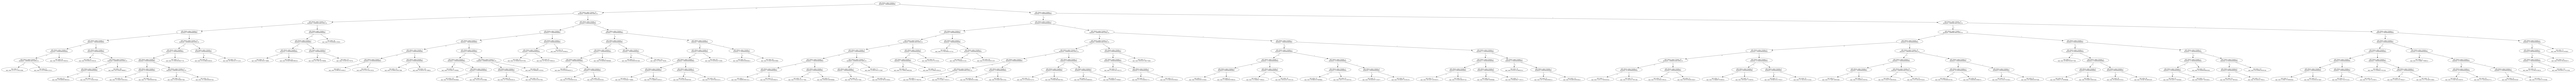

In [ ]:
import matplotlib # Importa biblioteca de gráficos

lgb.plot_tree(gbm) # Cria gráfico com base em modelo gerado
fig = matplotlib.pyplot.gcf() # Cria objeto de gráfico
fig.set_size_inches(300, 300) # Aumenta tamanho

### CatBoost

Embora o Cat Boost seja otimizado para lidar com variáveis categóricas, já que todo o nosso processamento e modelos anteriores haviam sido feitos, com sucesso, considerando apenas variáveis numéricas, resolvemos seguir esse padrão também neste algoritmo. Dessa maneira, apenas rodamos o método de regressão da biblioteca “catboost” nos splits de teste e treino que já tínhamos.

In [ ]:
import catboost as cb # Importa biblioteca

# Separa datasets de treino e teste
train_dataset = cb.Pool(x_train, y_train) 
test_dataset = cb.Pool(x_test, y_test)

In [ ]:
model = cb.CatBoostRegressor(loss_function='RMSE') # Cria objeto para modelagem
model.fit(train_dataset) # Treina modelo
y_pred = model.predict(test_dataset) # Testa modelo

Learning rate set to 0.090667
0:	learn: 6.0860547	total: 17ms	remaining: 17s
1:	learn: 5.7163494	total: 31.7ms	remaining: 15.8s
2:	learn: 5.3894224	total: 46.6ms	remaining: 15.5s
3:	learn: 5.0966794	total: 61.3ms	remaining: 15.3s
4:	learn: 4.8367887	total: 76.2ms	remaining: 15.2s
5:	learn: 4.6099770	total: 96.7ms	remaining: 16s
6:	learn: 4.4145955	total: 112ms	remaining: 15.8s
7:	learn: 4.2399548	total: 126ms	remaining: 15.7s
8:	learn: 4.0823453	total: 141ms	remaining: 15.5s
9:	learn: 3.9475859	total: 156ms	remaining: 15.4s
10:	learn: 3.8278509	total: 171ms	remaining: 15.4s
11:	learn: 3.7324202	total: 188ms	remaining: 15.5s
12:	learn: 3.6380254	total: 204ms	remaining: 15.5s
13:	learn: 3.5543002	total: 219ms	remaining: 15.4s
14:	learn: 3.4851927	total: 234ms	remaining: 15.4s
15:	learn: 3.4237218	total: 249ms	remaining: 15.3s
16:	learn: 3.3681679	total: 264ms	remaining: 15.3s
17:	learn: 3.3223407	total: 278ms	remaining: 15.2s
18:	learn: 3.2749314	total: 294ms	remaining: 15.2s
19:	learn: 

In [ ]:
# Erro médio absoluto
mean_absolute = mean_absolute_error(y_test, y_pred)
print("Erro médio: " + str(mean_absolute))

# Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
# decimais para facilitar a visualização
percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
print("Erro médio percentual: " + percentual_error + "%")

# R²
r2 = r2_score(y_test, y_pred)
print("R²: " + str(r2))

# R² ajustado
r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print("R² ajustado: " + str(r2))

Erro médio: 1.580566972563443
Erro médio percentual: 15.92%
R²: 0.8898189911874532
R² ajustado: 0.8898189911874532


Apesar de certamente não tão bom quanto as métricas obtidas previamente, o CatBoost ainda nos rendeu uma boa performance. Ficou, assim, marcado em nossas notas internas como um algoritmo com grande potencial para futuros testes com outras features e/ou saídas.

### XGB

No caso do XGB, as variáveis precisam ser obrigatoriamente numéricas. Assim, novamente inserimos o dataset conforme o tínhamos.

In [ ]:
# Importa bibliotecas necessárias
import xgboost as xgb
from xgboost import XGBRegressor

# Cria objeto de regressão
model = XGBRegressor()

# Treina o modelo
model.fit(x_train, y_train) 

[15:06:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred = model.predict(x_test) # Testa o modelo

In [ ]:
# Erro médio absoluto
mean_absolute = mean_absolute_error(y_test, y_pred)
print("Erro médio: " + str(mean_absolute))

# Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
# decimais para facilitar a visualização
percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
print("Erro médio percentual: " + percentual_error + "%")

# R²
r2 = r2_score(y_test, y_pred)
print("R²: " + str(r2))

# R² ajustado
r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print("R² ajustado: " + str(r2))

Erro médio: 2.0194466511913003
Erro médio percentual: 20.34%
R²: 0.8171118501051915
R² ajustado: 0.8171118501051915


É um resultado aceitável, quando analisado individualmente. Em muitos projetos, qualquer R² acima de 70% ou 75% já é satisfatório. No entanto, esse modelo ainda é muito inferior a outros que conseguimos até com algoritmos mais simples (como KNN ou árvore decisória). Logo, apesar de ter servido para ampliar nossos horizontes, o XGB não serviu aos nossos propósitos.

Com isso, terminamos as etapas de experimentações da Sprint 3, tendo testado a maioria dos algoritmos de regressão presentes na biblioteca “Scikit Learn” com diferentes tipos de features. Em suma, tivemos como melhor resultado o LightGBM, com cerca de 98% de R² e 7% de erro, muito melhor do que tínhamos imaginado. 


## Rodada 5

A quinta rodada foi uma experiência com um tipo de feature que nos interessava já há algum tempo: a divisão de horário em blocos, isto é, o agrupamento das 6h às 9h em “MANHÃ 1”, das 11h às 13h em “ALMOÇO”, etc. Acreditamos que isso nos daria mais pontos em cada grupo, possivelmente trazendo resultados mais acurados devido ao aumento em volume de amostras.

### Preparando features

Para chegar nas features desejadas, precisamos refazer quase todos os passos da Rodada 3, mudando apenas o tratamento dos horários. Assim, abrimos as planilhas, adicionamos a coluna de BBB, segregamos a data, transformamos categorias em colunas, calculamos feriados e, por fim, substituímos os horários por seus blocos associados.

In [ ]:
# Abre planilha original
df = pd.read_csv('/content/drive/MyDrive/Sprint 3/arquivos_fonte/emissora.csv')

In [ ]:
# Abre coluna de BBB
bbb = pd.read_csv("/content/drive/MyDrive/Sprint 3/arquivos_fonte/bbb.csv")

In [ ]:
# Adiciona coluna de BBB à df
df['BBB'] = bbb

In [ ]:
# Define função para separar o dia
def segregate_day(df):
  # Guarda datas da coluna 'Data' como objetos na variável 'dates'
  dates = pd.to_datetime(df['Data'])
  days = []
  # Este loop adiciona o dia de cada data em um array 'days'
  for date in dates:
    days.append(date.day)
  # Cria coluna 'Dia' com array 'days'
  df['Dia'] = days
  # Retorna df modificada
  return df

In [ ]:
# Executa segregação de dias
df = segregate_day(df)

In [ ]:
dummies = pd.get_dummies(df['Categoria'], prefix='Categoria')
# Concatena colunas auxiliares com planilha existente
df = pd.concat([df, dummies], axis=1)
# Deleta coluna de categorias original

In [ ]:
from datetime import date # Importa objeto de datas
import holidays # Importa biblioteca de feriados

holidays = holidays.Brazil() # Cria objeto de feriados brasileiros

# Esta função checa o valor de 'Data' de certa linha e, se ele estiver associado
# a um feriado do objeto 'holidays', retorna 1. Caso contrário, retorna 0.
def feriado(row): 
  if pd.to_datetime(row['Data']) in holidays:
    return 1
  return 0

# A função apply aplica a função "feriado" a todas as linhas da dataframe.
# O valor retornado é adicionado a uma nova coluna chamada "Feriado".
# Desse modo, datas de feriado ficam com 1 nessa coluna, enquanto as outras ficam
# com 0
df['Feriado'] = df.apply(lambda row: feriado(row), axis=1)

Para substituir os horários, primeiro criamos um hashmap associando cada string de horário com o bloco a que ele pertence. Depois, criamos outro hashmap associando cada bloco a um número, pois só variáveis numéricas são aceitas na maioria dos algoritmos de predição.

In [ ]:
# Hashmap de associação horário-bloco

timemap = {
    "06:00:00": "Manhã 1",
    "06:05:00": "Manhã 1",
    "06:10:00": "Manhã 1",
    "06:15:00": "Manhã 1",
    "06:20:00": "Manhã 1",
    "06:25:00": "Manhã 1",
    "06:30:00": "Manhã 1",
    "06:35:00": "Manhã 1",
    "06:40:00": "Manhã 1",
    "06:45:00": "Manhã 1",
    "06:50:00": "Manhã 1",
    "06:55:00": "Manhã 1",
    "07:00:00": "Manhã 1",
    "07:05:00": "Manhã 1",
    "07:10:00": "Manhã 1",
    "07:15:00": "Manhã 1",
    "07:20:00": "Manhã 1",
    "07:25:00": "Manhã 1",
    "07:30:00": "Manhã 1",
    "07:35:00": "Manhã 1",
    "07:40:00": "Manhã 1",
    "07:45:00": "Manhã 1",
    "07:50:00": "Manhã 1",
    "07:55:00": "Manhã 1",
    "08:00:00": "Manhã 1",
    "08:05:00": "Manhã 1",
    "08:10:00": "Manhã 1",
    "08:15:00": "Manhã 1",
    "08:20:00": "Manhã 1",
    "08:25:00": "Manhã 1",
    "08:30:00": "Manhã 1",
    "08:35:00": "Manhã 1",
    "08:40:00": "Manhã 1",
    "08:45:00": "Manhã 1",
    "08:50:00": "Manhã 1",
    "08:55:00": "Manhã 1",
    "09:00:00": "Manhã 2",
    "09:05:00": "Manhã 2",
    "09:10:00": "Manhã 2",
    "09:15:00": "Manhã 2",
    "09:20:00": "Manhã 2",
    "09:25:00": "Manhã 2",
    "09:30:00": "Manhã 2",
    "09:35:00": "Manhã 2",
    "09:40:00": "Manhã 2",
    "09:45:00": "Manhã 2",
    "09:50:00": "Manhã 2",
    "09:55:00": "Manhã 2",
    "10:00:00": "Manhã 2",
    "10:05:00": "Manhã 2",
    "10:10:00": "Manhã 2",
    "10:15:00": "Manhã 2",
    "10:20:00": "Manhã 2",
    "10:25:00": "Manhã 2",
    "10:30:00": "Manhã 2",
    "10:35:00": "Manhã 2",
    "10:40:00": "Manhã 2",
    "10:45:00": "Manhã 2",
    "10:50:00": "Manhã 2",
    "10:55:00": "Manhã 2",
    "11:00:00": "Manhã 2",
    "11:05:00": "Manhã 2",
    "11:10:00": "Manhã 2",
    "11:15:00": "Manhã 2",
    "11:20:00": "Manhã 2",
    "11:25:00": "Manhã 2",
    "11:30:00": "Manhã 2",
    "11:35:00": "Manhã 2",
    "11:40:00": "Manhã 2",
    "11:45:00": "Manhã 2",
    "11:50:00": "Manhã 2",
    "11:55:00": "Manhã 2",
    "12:00:00": "Almoço",
    "12:05:00": "Almoço",
    "12:10:00": "Almoço",
    "12:15:00": "Almoço",
    "12:20:00": "Almoço",
    "12:25:00": "Almoço",
    "12:30:00": "Almoço",
    "12:35:00": "Almoço",
    "12:40:00": "Almoço",
    "12:45:00": "Almoço",
    "12:50:00": "Almoço",
    "12:55:00": "Almoço",
    "13:00:00": "Almoço",
    "13:05:00": "Almoço",
    "13:10:00": "Almoço",
    "13:15:00": "Almoço",
    "13:20:00": "Almoço",
    "13:25:00": "Almoço",
    "13:30:00": "Tarde 1",
    "13:35:00": "Tarde 1",
    "13:40:00": "Tarde 1",
    "13:45:00": "Tarde 1",
    "13:50:00": "Tarde 1",
    "13:55:00": "Tarde 1",
    "14:00:00": "Tarde 1",
    "14:05:00": "Tarde 1",
    "14:10:00": "Tarde 1",
    "14:15:00": "Tarde 1",
    "14:20:00": "Tarde 1",
    "14:25:00": "Tarde 1",
    "14:30:00": "Tarde 1",
    "14:35:00": "Tarde 1",
    "14:40:00": "Tarde 1",
    "14:45:00": "Tarde 1",
    "14:50:00": "Tarde 1",
    "14:55:00": "Tarde 1",
    "15:00:00": "Tarde 1",
    "15:05:00": "Tarde 1",
    "15:10:00": "Tarde 1",
    "15:15:00": "Tarde 1",
    "15:20:00": "Tarde 1",
    "15:25:00": "Tarde 1",
    "15:30:00": "Tarde 1",
    "15:35:00": "Tarde 1",
    "15:40:00": "Tarde 1",
    "15:45:00": "Tarde 1",
    "15:50:00": "Tarde 1",
    "15:55:00": "Tarde 1",
    "16:00:00": "Tarde 2",
    "16:05:00": "Tarde 2",
    "16:10:00": "Tarde 2",
    "16:15:00": "Tarde 2",
    "16:20:00": "Tarde 2",
    "16:25:00": "Tarde 2",
    "16:30:00": "Tarde 2",
    "16:35:00": "Tarde 2",
    "16:40:00": "Tarde 2",
    "16:45:00": "Tarde 2",
    "16:50:00": "Tarde 2",
    "16:55:00": "Tarde 2",
    "17:00:00": "Tarde 2",
    "17:05:00": "Tarde 2",
    "17:10:00": "Tarde 2",
    "17:15:00": "Tarde 2",
    "17:20:00": "Tarde 2",
    "17:25:00": "Tarde 2",
    "17:30:00": "Tarde 2",
    "17:35:00": "Tarde 2",
    "17:40:00": "Tarde 2",
    "17:45:00": "Tarde 2",
    "17:50:00": "Tarde 2",
    "17:55:00": "Tarde 2",
    "18:00:00": "Horário Nobre",
    "18:05:00": "Horário Nobre",
    "18:10:00": "Horário Nobre",
    "18:15:00": "Horário Nobre",
    "18:20:00": "Horário Nobre",
    "18:25:00": "Horário Nobre",
    "18:30:00": "Horário Nobre",
    "18:35:00": "Horário Nobre",
    "18:40:00": "Horário Nobre",
    "18:45:00": "Horário Nobre",
    "18:50:00": "Horário Nobre",
    "18:55:00": "Horário Nobre",
    "19:00:00": "Horário Nobre",
    "19:05:00": "Horário Nobre",
    "19:10:00": "Horário Nobre",
    "19:15:00": "Horário Nobre",
    "19:20:00": "Horário Nobre",
    "19:25:00": "Horário Nobre",
    "19:30:00": "Horário Nobre",
    "19:35:00": "Horário Nobre",
    "19:40:00": "Horário Nobre",
    "19:45:00": "Horário Nobre",
    "19:50:00": "Horário Nobre",
    "19:55:00": "Horário Nobre",
    "20:00:00": "Horário Nobre",
    "20:05:00": "Horário Nobre",
    "20:10:00": "Horário Nobre",
    "20:15:00": "Horário Nobre",
    "20:20:00": "Horário Nobre",
    "20:25:00": "Horário Nobre",
    "20:30:00": "Horário Nobre",
    "20:35:00": "Horário Nobre",
    "20:40:00": "Horário Nobre",
    "20:45:00": "Horário Nobre",
    "20:50:00": "Horário Nobre",
    "20:55:00": "Horário Nobre",
    "21:00:00": "Horário Nobre",
    "21:05:00": "Horário Nobre",
    "21:10:00": "Horário Nobre",
    "21:15:00": "Horário Nobre",
    "21:20:00": "Horário Nobre",
    "21:25:00": "Horário Nobre",
    "21:30:00": "Horário Nobre",
    "21:35:00": "Horário Nobre",
    "21:40:00": "Horário Nobre",
    "21:45:00": "Horário Nobre",
    "21:50:00": "Horário Nobre",
    "21:55:00": "Horário Nobre",
    "22:00:00": "Horário Nobre",
    "22:05:00": "Horário Nobre",
    "22:10:00": "Horário Nobre",
    "22:15:00": "Horário Nobre",
    "22:20:00": "Horário Nobre",
    "22:25:00": "Horário Nobre",
    "22:30:00": "Noite",
    "22:35:00": "Noite",
    "22:40:00": "Noite",
    "22:45:00": "Noite",
    "22:50:00": "Noite",
    "22:55:00": "Noite",
    "23:00:00": "Noite",
    "23:05:00": "Noite",
    "23:10:00": "Noite",
    "23:15:00": "Noite",
    "23:20:00": "Noite",
    "23:25:00": "Noite",
    "23:30:00": "Noite",
    "23:35:00": "Noite",
    "23:40:00": "Noite",
    "23:45:00": "Noite",
    "23:50:00": "Noite",
    "23:55:00": "Noite",
    "24:00:00": "Noite",
    "24:05:00": "Noite",
    "24:10:00": "Noite",
    "24:15:00": "Noite",
    "24:20:00": "Noite",
    "24:25:00": "Noite",
    "24:30:00": "Madrugada",
    "24:35:00": "Madrugada",
    "24:40:00": "Madrugada",
    "24:45:00": "Madrugada",
    "24:50:00": "Madrugada",
    "24:55:00": "Madrugada",
    "25:00:00": "Madrugada",
    "25:05:00": "Madrugada",
    "25:10:00": "Madrugada",
    "25:15:00": "Madrugada",
    "25:20:00": "Madrugada",
    "25:25:00": "Madrugada",
    "25:30:00": "Madrugada",
    "25:35:00": "Madrugada",
    "25:40:00": "Madrugada",
    "25:45:00": "Madrugada",
    "25:50:00": "Madrugada",
    "25:55:00": "Madrugada",
    "26:00:00": "Madrugada",
    "26:05:00": "Madrugada",
    "26:10:00": "Madrugada",
    "26:15:00": "Madrugada",
    "26:20:00": "Madrugada",
    "26:25:00": "Madrugada",
    "26:30:00": "Madrugada",
    "26:35:00": "Madrugada",
    "26:40:00": "Madrugada",
    "26:45:00": "Madrugada",
    "26:50:00": "Madrugada",
    "26:55:00": "Madrugada",
    "27:00:00": "Madrugada",
    "27:05:00": "Madrugada",
    "27:10:00": "Madrugada",
    "27:15:00": "Madrugada",
    "27:20:00": "Madrugada",
    "27:25:00": "Madrugada",
    "27:30:00": "Madrugada",
    "27:35:00": "Madrugada",
    "27:40:00": "Madrugada",
    "27:45:00": "Madrugada",
    "27:50:00": "Madrugada",
    "27:55:00": "Madrugada",
    "28:00:00": "Madrugada",
    "28:05:00": "Madrugada",
    "28:10:00": "Madrugada",
    "28:15:00": "Madrugada",
    "28:20:00": "Madrugada",
    "28:25:00": "Madrugada",
    "28:30:00": "Madrugada",
    "28:35:00": "Madrugada",
    "28:40:00": "Madrugada",
    "28:45:00": "Madrugada",
    "28:50:00": "Madrugada",
    "28:55:00": "Madrugada",
    "29:00:00": "Madrugada",
    "29:05:00": "Madrugada",
    "29:10:00": "Madrugada",
    "29:15:00": "Madrugada",
    "29:20:00": "Madrugada",
    "29:25:00": "Madrugada",
    "29:30:00": "Madrugada",
    "29:35:00": "Madrugada",
    "29:40:00": "Madrugada",
    "29:45:00": "Madrugada",
    "29:50:00": "Madrugada",
    "29:55:00": "Madrugada",
}

# Hashmap de associação bloco-número
blocos = {
    "Manhã 1": 0,
    "Manhã 2": 1,
    "Almoço": 2,
    "Tarde 1": 3,
    "Tarde 2": 4,
    "Horário Nobre": 5,
    "Noite": 6,
    "Madrugada": 7,
}

In [ ]:
df['Hora Início'] = df['Hora Início'].replace(timemap) # Substitui os horários pelos blocos
df['Hora Início'] = df['Hora Início'].replace(blocos) # Substitui os blocos pelos números

Novamente, salvamos os dados preparados e os abrimos com gdown.

In [8]:
df.to_csv('/content/drive/MyDrive/Sprint 3/rodada_5prepared_data.csv')

In [9]:
!gdown '1-13R7kXF4Akl6UZrPiSdUIqpzBryNc_G'
df = pd.read_csv('rodada_5prepared_data.csv')

Downloading...
From: https://drive.google.com/uc?id=1-13R7kXF4Akl6UZrPiSdUIqpzBryNc_G
To: /content/rodada_5prepared_data.csv
100% 3.01M/3.01M [00:00<00:00, 205MB/s]


### Regressão linear

In [ ]:
from sklearn.model_selection import train_test_split

model = df.copy() # Copia a dataframe

# Dividindo x e y
y = model['Total Domicílios | Rat%'].values # Score de audiência
x = model[['Dia da Semana', 'BBB',
       'Mês', 'Dia', 'Feriado', 'Categoria_AUDITORIO',
       'Categoria_CARROS E MOTORES', 'Categoria_CULINARIO', 'Categoria_DEBATE',
       'Categoria_DOCUMENTARIO', 'Categoria_EDUCATIVO', 'Categoria_ENTREVISTA',
       'Categoria_ESPORTE', 'Categoria_FEMININO', 'Categoria_FILME',
       'Categoria_FUTEBOL', 'Categoria_GAME SHOW', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MINISSERIE', 'Categoria_MUSICAL',
       'Categoria_NOVELA', 'Categoria_POLITICO', 'Categoria_PREMIACAO',
       'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM',
       'Categoria_RURAL', 'Categoria_SERIES', 'Categoria_SHOW']].values # Features de data, hora e categoria

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 57)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

# Treinando o modelo
model = LinearRegression().fit(x_train, y_train)

# Testando o modelo
y_pred = model.predict(x_test)

# Avaliando testes
# Erro médio absoluto
mean_absolute = mean_absolute_error(y_test, y_pred)
print("Erro médio: " + str(mean_absolute))

# Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
# decimais para facilitar a visualização
percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
print("Erro médio percentual: " + percentual_error + "%")

# R²
r2 = r2_score(y_test, y_pred)
print("R²: " + str(r2))

# R² ajustado
r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print("R² ajustado: " + str(r2))

Erro médio: 3.879666885112597
Erro médio percentual: 39.06%
R²: 0.4075769499489936
R² ajustado: 0.4075769499489936


A rodada 5 teve um resultado ainda pior que a regressão linear inicial, com as features da rodada 1. Mesmo assim, por termos pouca confiança nos desempenhos em regressão linear, resolvemos testar essas features nos outros algoritmos.

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Esta função aplica o algoritmo de KNN para k vizinhos e mostra as métricas associadas.
# Criamos esta função para não ficar repetindo esse trecho de código nesta subseção do Colab.
def evaluate_knn(k):
  knn = KNeighborsRegressor(n_neighbors=k) # Cria objeto de KNN com k (argumento) vizinhos
  knn.fit( x_train, y_train.squeeze()) # Treina modelo
  y_pred = knn.predict(x_test) # Testa modelo

  # Erro médio absoluto
  mean_absolute = mean_absolute_error(y_test, y_pred)
  print("Erro médio: " + str(mean_absolute))

  # Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
  # decimais para facilitar a visualização
  percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
  print("Erro médio percentual: " + percentual_error + "%")

  # R²
  r2 = r2_score(y_test, y_pred)
  print("R²: " + str(r2))

  # R² ajustado
  r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
  print("R² ajustado: " + str(r2))

In [ ]:
evaluate_knn(2)

Erro médio: 3.6531999360302185
Erro médio percentual: 36.83%
R²: 0.3546405818810551
R² ajustado: 0.3546405818810551


In [ ]:
evaluate_knn(3)

Erro médio: 3.490243237480201
Erro médio percentual: 35.07%
R²: 0.42432885063303727
R² ajustado: 0.42432885063303727


In [ ]:
evaluate_knn(7)

Erro médio: 3.2889777889954566
Erro médio percentual: 33.19%
R²: 0.5101615387575982
R² ajustado: 0.5101615387575982


In [ ]:
evaluate_knn(9)

Erro médio: 3.2771951958355334
Erro médio percentual: 33.01%
R²: 0.5196088265047871
R² ajustado: 0.5196088265047871


In [ ]:
evaluate_knn(15)

Erro médio: 3.3014602473498234
Erro médio percentual: 33.1%
R²: 0.5289214199575288
R² ajustado: 0.5289214199575288


No caso do KNN, além de demorar muito mais do que as outras rodadas, chegando a minutos com o k ainda baixo (k=2 ou k=3), o R² foi péssimo. Paramos os experimentos no k=15, pois percebemos que as métricas não melhoraram o suficiente para justificar os recursos computacionais.

### Decision tree

Novamente, testamos parâmetros automáticos e customizados.

In [ ]:
# Define função para profundidade customizada

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def evaluate_dt(depth):
  # Cria objeto de decision tree com profundidade depth (argumento)
  dt = DecisionTreeRegressor(max_depth=depth) 
  dt.fit(x_train, y_train.squeeze()) # Cria decision tree com base em dados de treino
  y_pred = dt.predict(x_test) # Faz predições para dataset de test

  # Erro médio absoluto
  mean_absolute = mean_absolute_error(y_test, y_pred)
  print("Erro médio: " + str(mean_absolute))

  # Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
  # decimais para facilitar a visualização
  percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
  print("Erro médio percentual: " + percentual_error + "%")

  # R²
  r2 = r2_score(y_test, y_pred)
  print("R²: " + str(r2))

  # R² ajustado
  r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
  print("R² ajustado: " + str(r2))

Após redefinir a função, como da última vez, testamos também o modelo automático.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Objeto com argumentos vazios, para indicar profundidade automática
dt = DecisionTreeRegressor()
dt.fit( x_train, y_train.squeeze() ) # Treina modelo
y_pred = dt.predict(x_test) # Testa modelo

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Erro médio absoluto
mean_absolute = mean_absolute_error(y_test, y_pred)
print("Erro médio: " + str(mean_absolute))

# Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
# decimais para facilitar a visualização
percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
print("Erro médio percentual: " + percentual_error + "%")

# R²
r2 = r2_score(y_test, y_pred)
print("R²: " + str(r2))

# R² ajustado
r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print("R² ajustado: " + str(r2))

Erro médio: 3.1041545708719718
Erro médio percentual: 31.26%
R²: 0.5644216533352943
R² ajustado: 0.5644216533352943


Embora ele supere, como esperado, o KNN anterior e até as regressões lineares, não se compara aos outros resultados obtidos nas rodadas anteriores. Testando profundidades manualmente, temos:

In [ ]:
evaluate_dt(2)

Erro médio: 4.166501715306637
Erro médio percentual: 41.99%
R²: 0.32804906563363345
R² ajustado: 0.32804906563363345


In [ ]:
evaluate_dt(3)

Erro médio: 4.075862282002847
Erro médio percentual: 41.08%
R²: 0.3577074753702595
R² ajustado: 0.3577074753702595


In [ ]:
evaluate_dt(10)

Erro médio: 3.5570220860496606
Erro médio percentual: 35.81%
R²: 0.48336846268927947
R² ajustado: 0.48336846268927947


In [ ]:
evaluate_dt(20)

Erro médio: 3.1773485106480717
Erro médio percentual: 31.98%
R²: 0.5556983701274534
R² ajustado: 0.5556983701274534


In [ ]:
evaluate_dt(30)

Erro médio: 3.1059406156743425
Erro médio percentual: 31.28%
R²: 0.5643246572645286
R² ajustado: 0.5643246572645286


In [ ]:
evaluate_dt(100)

Erro médio: 3.104247212823964
Erro médio percentual: 31.26%
R²: 0.5644113388197142
R² ajustado: 0.5644113388197142


Como podemos ver, existe uma melhora no R² e erro médio conforme a profundidade máxima aumenta; porém, esse acréscimo é muito pequeno para justificar o gasto computacional e temporal. Ao nos aproximarmos de 100 como argumento, esse ganho passa a ser de apenas no R², mesmo quando a profundidade torna-se três vezes maior. Assim, a árvore decisória também não oferece resultados adequados.

### Random forest generator

Seguimos os mesmos passos das últimas rodadas, definindo uma função para avaliação de erro de cada modelo e testando vários valores para estimadores.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def evaluate_forest(estimators):
  # Cria objeto de floresta
  regressor = RandomForestRegressor(n_estimators=estimators, random_state=0)
  # Treina modelo
  regressor.fit(x_train, y_train)
  # Testa modelo
  y_pred = regressor.predict(x_test)

  # Erro médio absoluto
  mean_absolute = mean_absolute_error(y_test, y_pred)
  print("Erro médio: " + str(mean_absolute))

  # Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
  # decimais para facilitar a visualização
  percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
  print("Erro médio percentual: " + percentual_error + "%")

  # R²
  r2 = r2_score(y_test, y_pred)
  print("R²: " + str(r2))

  # R² ajustado
  r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
  print("R² ajustado: " + str(r2))

In [ ]:
evaluate_forest(20)

Erro médio: 3.107251345700086
Erro médio percentual: 31.28%
R²: 0.564047996324722
R² ajustado: 0.564047996324722


In [ ]:
evaluate_forest(100)

Erro médio: 3.104838331916731
Erro médio percentual: 31.26%
R²: 0.564462505416807
R² ajustado: 0.564462505416807


In [ ]:
evaluate_forest(400)

Erro médio: 3.1047739153911933
Erro médio percentual: 31.27%
R²: 0.5644984185387432
R² ajustado: 0.5644984185387432


Baseando-nos nos resultados anteriores, não esperávamos que o algoritmo de floresta retornasse resultados comparáveis aos sucessos das outras rodadas com as features atuais. Ainda assim, a baixa melhora relativa em relação à árvore decisória nos surpreendeu, pois esse algoritmo deveria justamente otimizar o potencial de decision trees. Nossa conclusão, frente a isso, é que de fato existe um limite de performance para modelos baseados em árvores de decisão para as features que escolhemos, de modo que não podemos esperar por muito mais do que 55% de R² com esses algoritmos.

### LightGBM

Como na Rodada 4, utilizando os hiperparâmetros sugeridos pelo grupo 4. 

In [ ]:
hyper_params = {
    'task': 'train', #função
    'boosting_type': 'gbdt', #tipo da regressão
    'objective': 'regression', #tipo do modelo
    'metric': ['l1','l2'], #erro médio quadrático e erro médio absoluto
    'learning_rate': 0.08, #velocidade do aprendizado
    'feature_fraction': 1, #porcentagem do dataframe a ser utilizado
    'verbose': 0, #usado para retirar possíveis bugs existentes (debug)
    "max_depth": 8, #limita o tamanho de cada árvore
    "num_leaves": 128, #limita o número de folhas que cada árvore pode ter
    "num_iterations": 20_000 #quantidade de tentativas
}

In [ ]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor(**hyper_params) # Cria objeto de LightGBM

In [ ]:
# Treina modelo
gbm.fit(x_train, y_train,
        eval_set=[(x_test, y_test)],
        early_stopping_rounds=2_500)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Streaming output truncated to the last 5000 lines.
[13690]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13691]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13692]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13693]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13694]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13695]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13696]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13697]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13698]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13699]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13700]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13701]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13702]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13703]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13704]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13705]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13706]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13707]	valid_0's l1: 3.10604	valid_0's l2: 18.6087
[13708]	valid

LGBMRegressor(feature_fraction=1, learning_rate=0.08, max_depth=8,
              metric=['l1', 'l2'], num_iterations=20000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [ ]:
y_pred = gbm.predict(x_test) # Testa modelo

In [ ]:
# Avaliação do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Erro médio absoluto
mean_absolute = mean_absolute_error(y_test, y_pred)
print("Erro médio: " + str(mean_absolute))

# Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
# decimais para facilitar a visualização
percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
print("Erro médio percentual: " + percentual_error + "%")

# R²
r2 = r2_score(y_test, y_pred)
print("R²: " + str(r2))

# R² ajustado
r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print("R² ajustado: " + str(r2))

Erro médio: 3.105252071494387
Erro médio percentual: 31.17%
R²: 0.5645468235985043
R² ajustado: 0.5645468235985043


Com esse modelo, percebemos que o conjunto de features desta rodada realmente não rende bons resultados. Nem o LightGBM, que havia sido nosso melhor algoritmo até agora, alcançou métricas satisfatórias. Concluímos, portanto, que deveríamos manter a divisão de horário em hora e minuto em vez de agregá-los em blocos.

## Aplicando LightGBM em outras saídas

Apesar dos péssimos resultados na Rodada 5, o sucesso da Rodada 4 nos motivou a investir o restante de tempo da sprint na criação de modelos para outros tipos de audiência (“Total Domicílios | Shr%”, “Total Indivíduos | Fid%” e “Total Indivíduos | Rch%”). Dada a performance superior do LightGBM frente a todos os outros algoritmos, resolvemos aplicar somente ele nesta etapa.

### Preparando features



Antes disso, entretanto, tivemos de retornar aos arquivos da seção de pré-processamento. Naquele período, havíamos removido as colunas relacionadas à Share, Fidelidade e Reach, por não serem o objetivo principal do projeto. Agora, tínhamos de resgatá-las e manipulá-las para que tivessem as features formatadas conforme fora utilizado nas rodadas desta seção.

Ademais, devido a alguns erros que tivemos ao tentar utilizar as colunas dessas taxas como saídas, percebemos que os dados nesses campos não estavam padronizados. Em mais detalhes, os números tipo float eram representados ora com vírgula, ora com ponto. Logo, foi preciso adicionar um passo extra de preparação para padronizar esses valores.

In [ ]:
# Abre planilha original
df = pd.read_csv('/content/drive/MyDrive/Sprint 3/arquivos_fonte/emissora_todas_audiencias.csv')

In [ ]:
# Abre coluna de BBB
bbb = pd.read_csv("/content/drive/MyDrive/Sprint 3/arquivos_fonte/bbb.csv")

In [ ]:
# Adiciona coluna de BBB à df
df['BBB'] = bbb

In [ ]:
def segregate_month(df):
  # Guarda datas da coluna 'Data' como objetos na variável 'dates'
  dates = pd.to_datetime(df['Data'])
  months = []
  # Este loop adiciona o mês de cada data em um array 'months'
  for date in dates:
    months.append(date.month)
  # Cria coluna 'mês' com array 'months'
  df['Mês'] = months
  # Salva em CSV na pasta correta
  return df

# Define função para separar o dia
def segregate_day(df):
  # Guarda datas da coluna 'Data' como objetos na variável 'dates'
  dates = pd.to_datetime(df['Data'])
  days = []
  # Este loop adiciona o dia de cada data em um array 'days'
  for date in dates:
    days.append(date.day)
  # Cria coluna 'Dia' com array 'days'
  df['Dia'] = days
  # Retorna df modificada
  return df

In [ ]:
# Aplica funções para divisão de data
df = segregate_month(df)
df = segregate_day(df)

In [ ]:
series = df['Hora Início'] # Isola coluna de horários
hours = [] # Inicia array para guardar unidades de hora
minutes = [] # Inicia array para guardar unidades de minuto

# Este loop passa por cada item da coluna de horário, acessa as unidades através
# dos indexes do valor em string, transforma em inteiro e salva no array
for time in series:
  hours.append(int(time[:2])) # A hora corresponde aos caracteres 0 e 1
  # O caractere 2 é ":" no formato "xx:xx:xx"
  minutes.append(int(time[3:5])) # O minuto corresponde aos caracteres 3 e 4

# Os arrays são adicionados como colunas na dataframe
df['Hora'] = hours
df['Minuto'] = minutes

Por essa planilha ser mais antiga, também é preciso implementar a troca dos dias da semana por número mais uma vez.

In [ ]:
# Hashmap de associação de dias da semana com números
week_encoding = {'Segunda': 1, 'Terça': 2, 'Quarta': 3, 'Quinta': 4, 'Sexta': 5, 
                 'Sábado': 6, 'Domingo': 7}

# Faz a substituição com base no hashmap
df['Dia da Semana'] = df['Dia da Semana'].replace(week_encoding)


Também criamos a coluna de feriados:

In [ ]:
from datetime import date # Importa objeto de datas
import holidays # Importa biblioteca de feriados

holidays = holidays.Brazil() # Cria objeto de feriados brasileiros

# Esta função checa o valor de 'Data' de certa linha e, se ele estiver associado
# a um feriado do objeto 'holidays', retorna 1. Caso contrário, retorna 0.
def feriado(row): 
  if pd.to_datetime(row['Data']) in holidays:
    return 1
  return 0

# A função apply aplica a função "feriado" a todas as linhas da dataframe.
# O valor retornado é adicionado a uma nova coluna chamada "Feriado".
# Desse modo, datas de feriado ficam com 1 nessa coluna, enquanto as outras ficam
# com 0
df['Feriado'] = df.apply(lambda row: feriado(row), axis=1)

Ademais, fizemos o one-hot encoding de categorias.

In [ ]:
# Este método transforma os valores únicos de uma coluna em colunas individuais auxiliares,
# seguindo o modelo de one-hot encoding. O parâmetro "prefix" determina o prefixo de cada coluna.
dummies = pd.get_dummies(df['Categoria'], prefix='Categoria')

# Concatena colunas auxiliares com planilha existente
df = pd.concat([df, dummies], axis=1)

# Deleta coluna de categorias original
df.pop('Categoria')

# Mostra resultados
display(df)

,Data,Hora Início,Emissora,Dia da Semana,Total Domicílios | Rat%,AB | Rat%,C1 | Rat%,C2 | Rat%,DE | Rat%,Masculino | Rat%,...,Categoria_MUSICAL,Categoria_NOVELA,Categoria_POLITICO,Categoria_PREMIACAO,Categoria_REALITY SHOW,Categoria_RELIGIOSO,Categoria_REPORTAGEM,Categoria_RURAL,Categoria_SERIES,Categoria_SHOW
0,2020-06-01,06:00:00,Emissora A,1,4.27,2.40,0.31,0.82,5.23,1.65,...,0,0,0,0,0,0,0,0,0,0
1,2020-06-01,06:05:00,Emissora A,1,4.89,3.02,0.51,1.08,5.23,1.89,...,0,0,0,0,0,0,0,0,0,0
2,2020-06-01,06:10:00,Emissora A,1,5.74,3.13,1.53,1.22,5.23,1.97,...,0,0,0,0,0,0,0,0,0,0
3,2020-06-01,06:15:00,Emissora A,1,6.55,3.06,1.86,1.48,6.46,1.92,...,0,0,0,0,0,0,0,0,0,0
4,2020-06-01,06:20:00,Emissora A,1,7.27,3.49,2.18,1.48,6.46,2.23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218846,2022-06-30,29:35:00,Emissora A,4,1.67,0.30,0.41,1.03,0.53,0.17,...,0,0,0,0,0,0,0,0,0,0
218847,2022-06-30,29:40:00,Emissora A,4,1.97,0.30,0.41,1.45,0.35,0.17,...,0,0,0,0,0,0,0,0,0,0
218848,2022-06-30,29:45:00,Emissora A,4,2.22,0.30,0.41,1.45,0.88,0.17,...,0,0,0,0,0,0,0,0,0,0
218849,2022-06-30,29:50:00,Emissora A,4,2.71,0.54,0.41,1.81,0.88,0.37,...,0,0,0,0,0,0,0,0,0,0


Mais uma vez, salvamos a planilha e a abrimos pelo gdown para garantir a reprodutibilidade:

In [10]:
df.to_csv('/content/drive/MyDrive/Sprint 3/lightgbm_dados.csv')

In [12]:
!gdown '1-3MSAB1J3bWoo0-k-Yep7C3HTd82y6Ax'
df = pd.read_csv('lightgbm_dados.csv')

Downloading...
From: https://drive.google.com/uc?id=1-3MSAB1J3bWoo0-k-Yep7C3HTd82y6Ax
To: /content/lightgbm_dados.csv
100% 3.07M/3.07M [00:00<00:00, 85.9MB/s]


Finalmente, definimos os parâmetros do LightGBM, seguindo recomendações do grupo 4.

In [ ]:
hyper_params = {
    'task': 'train', #função
    'boosting_type': 'gbdt', #tipo da regressão
    'objective': 'regression', #tipo do modelo
    'metric': ['l1','l2'], #erro médio quadrático e erro médio absoluto
    'learning_rate': 0.08, #velocidade do aprendizado
    'feature_fraction': 1, #porcentagem do dataframe a ser utilizado
    'verbose': 0, #usado para retirar possíveis bugs existentes (debug)
    "max_depth": 8, #limita o tamanho de cada árvore
    "num_leaves": 128, #limita o número de folhas que cada árvore pode ter
    "num_iterations": 20_000 #quantidade de tentativas
}

### Shr%

Antes de aplicar o método de LightGBM, precisamos padronizar os decimais na coluna de saída. Isso se deu porque, nessa coluna, alguns decimais foram representados com vírgula e outros com ponto. Nesse sentido, tivemos de manipular cada valor para garantir que ele fosse demarcado com ponto nas casas decimais.

In [ ]:
# Esta função acessa cada valor da coluna de audiência, transforma-o em string,
# substitui vírgulas por pontos e volta o tipo para float
df['Total Domicílios | Shr%'] = df['Total Domicílios | Shr%'].apply(lambda x: float(str(x).replace(',', '.')))

Agora podemos executar o LightGBM.

In [ ]:
from sklearn.model_selection import train_test_split

model = df.copy() # Faz cópia de dataframe

# Dividindo x e y
y = model['Total Domicílios | Shr%'].values # Score de audiência
x = model[['Dia da Semana', 'BBB',
       'Mês', 'Dia', 'Hora', 'Minuto', 'Feriado', 'Categoria_AUDITORIO',
       'Categoria_CARROS E MOTORES', 'Categoria_CULINARIO', 'Categoria_DEBATE',
       'Categoria_DOCUMENTARIO', 'Categoria_EDUCATIVO', 'Categoria_ENTREVISTA',
       'Categoria_ESPORTE', 'Categoria_FEMININO', 'Categoria_FILME',
       'Categoria_FUTEBOL', 'Categoria_GAME SHOW', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MINISSERIE', 'Categoria_MUSICAL',
       'Categoria_NOVELA', 'Categoria_POLITICO', 'Categoria_PREMIACAO',
       'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM',
       'Categoria_RURAL', 'Categoria_SERIES', 'Categoria_SHOW']].values # Features de data, hora e categoria

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [ ]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor(**hyper_params) # Cria objeto com hiperparâmetros

In [ ]:
# Treina o modelo
gbm.fit(x_train, y_train,
        eval_set=[(x_test, y_test)],
        early_stopping_rounds=2_500)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Streaming output truncated to the last 5000 lines.
[15003]	valid_0's l2: 10.5423	valid_0's l1: 2.42467
[15004]	valid_0's l2: 10.5424	valid_0's l1: 2.42468
[15005]	valid_0's l2: 10.5426	valid_0's l1: 2.42469
[15006]	valid_0's l2: 10.5425	valid_0's l1: 2.42469
[15007]	valid_0's l2: 10.5425	valid_0's l1: 2.42468
[15008]	valid_0's l2: 10.5424	valid_0's l1: 2.42469
[15009]	valid_0's l2: 10.5422	valid_0's l1: 2.42466
[15010]	valid_0's l2: 10.5422	valid_0's l1: 2.42464
[15011]	valid_0's l2: 10.5421	valid_0's l1: 2.42463
[15012]	valid_0's l2: 10.542	valid_0's l1: 2.42463
[15013]	valid_0's l2: 10.542	valid_0's l1: 2.42461
[15014]	valid_0's l2: 10.542	valid_0's l1: 2.42462
[15015]	valid_0's l2: 10.5418	valid_0's l1: 2.4246
[15016]	valid_0's l2: 10.5419	valid_0's l1: 2.42462
[15017]	valid_0's l2: 10.5418	valid_0's l1: 2.42462
[15018]	valid_0's l2: 10.5417	valid_0's l1: 2.42461
[15019]	valid_0's l2: 10.5418	valid_0's l1: 2.42461
[15020]	valid_0's l2: 10.5417	valid_0's l1: 2.42459
[15021]	valid_0's

LGBMRegressor(feature_fraction=1, learning_rate=0.08, max_depth=8,
              metric=['l1', 'l2'], num_iterations=20000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [ ]:
y_pred = gbm.predict(x_test) # Testa o modelo (faz predições)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Erro médio absoluto
mean_absolute = mean_absolute_error(y_test, y_pred)
print("Erro médio: " + str(mean_absolute))

# Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
# decimais para facilitar a visualização
percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
print("Erro médio percentual: " + percentual_error + "%")

# R²
r2 = r2_score(y_test, y_pred)
print("R²: " + str(r2))

# R² ajustado
r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print("R² ajustado: " + str(r2))

Erro médio: 2.3811322952875527
Erro médio percentual: 7.65%
R²: 0.9029153060018735
R² ajustado: 0.9029153060018735


Então, salvamos o modelo para uso futuro.

In [ ]:
gbm.booster_.save_model('/content/drive/MyDrive/Sprint 3/modelos/shr.txt') # Salva o modelo em txt

### Rch%

In [ ]:
# Esta função acessa cada valor da coluna de audiência, transforma-o em string,
# substitui vírgulas por pontos e volta o tipo para float
df['Total Domicílios | Rch%'] = df['Total Domicílios | Rch'].apply(lambda x: float(str(x).replace(',', '.')))

In [ ]:
from sklearn.model_selection import train_test_split

model = df.copy() # Cria cópia da dataframe

# Dividindo x e y
y = model['Total Indivíduos | Rch%'].values # Score de audiência
x = model[['Dia da Semana', 'BBB',
       'Mês', 'Dia', 'Hora', 'Minuto', 'Feriado', 'Categoria_AUDITORIO',
       'Categoria_CARROS E MOTORES', 'Categoria_CULINARIO', 'Categoria_DEBATE',
       'Categoria_DOCUMENTARIO', 'Categoria_EDUCATIVO', 'Categoria_ENTREVISTA',
       'Categoria_ESPORTE', 'Categoria_FEMININO', 'Categoria_FILME',
       'Categoria_FUTEBOL', 'Categoria_GAME SHOW', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MINISSERIE', 'Categoria_MUSICAL',
       'Categoria_NOVELA', 'Categoria_POLITICO', 'Categoria_PREMIACAO',
       'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM',
       'Categoria_RURAL', 'Categoria_SERIES', 'Categoria_SHOW']].values # Features de data, hora e categoria

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [ ]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor(**hyper_params) # Cria objeto com hiperparâmetros

In [ ]:
gbm.fit(x_train, y_train,
        eval_set=[(x_test, y_test)],
        early_stopping_rounds=2_500) # Treina modelo

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Streaming output truncated to the last 5000 lines.
[15003]	valid_0's l1: 0.423593	valid_0's l2: 0.351886
[15004]	valid_0's l1: 0.423586	valid_0's l2: 0.351881
[15005]	valid_0's l1: 0.423585	valid_0's l2: 0.351881
[15006]	valid_0's l1: 0.423583	valid_0's l2: 0.35188
[15007]	valid_0's l1: 0.423579	valid_0's l2: 0.351877
[15008]	valid_0's l1: 0.423582	valid_0's l2: 0.351878
[15009]	valid_0's l1: 0.42358	valid_0's l2: 0.351875
[15010]	valid_0's l1: 0.423577	valid_0's l2: 0.351867
[15011]	valid_0's l1: 0.423573	valid_0's l2: 0.351861
[15012]	valid_0's l1: 0.423571	valid_0's l2: 0.351861
[15013]	valid_0's l1: 0.423566	valid_0's l2: 0.351852
[15014]	valid_0's l1: 0.423564	valid_0's l2: 0.351851
[15015]	valid_0's l1: 0.423559	valid_0's l2: 0.35185
[15016]	valid_0's l1: 0.423559	valid_0's l2: 0.35185
[15017]	valid_0's l1: 0.423559	valid_0's l2: 0.35185
[15018]	valid_0's l1: 0.423555	valid_0's l2: 0.351844
[15019]	valid_0's l1: 0.423558	valid_0's l2: 0.351849
[15020]	valid_0's l1: 0.423555	valid

LGBMRegressor(feature_fraction=1, learning_rate=0.08, max_depth=8,
              metric=['l1', 'l2'], num_iterations=20000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [ ]:
y_pred = gbm.predict(x_test) # Testa modelo (faz predições)

In [ ]:
# Erro médio absoluto
mean_absolute = mean_absolute_error(y_test, y_pred)
print("Erro médio: " + str(mean_absolute))

# Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
# decimais para facilitar a visualização
percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
print("Erro médio percentual: " + percentual_error + "%")

# R²
r2 = r2_score(y_test, y_pred)
print("R²: " + str(r2))

# R² ajustado
r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print("R² ajustado: " + str(r2))

Erro médio: 0.41743243733821916
Erro médio percentual: 8.55%
R²: 0.9690144458599838
R² ajustado: 0.9690144458599838


In [ ]:
gbm.booster_.save_model('/content/drive/MyDrive/Sprint 3/modelos/rch.txt')

### Fid%

In [ ]:
# Esta função acessa cada valor da coluna de audiência, transforma-o em string,
# substitui vírgulas por pontos e volta o tipo para float
df['Total Domicílios | Rch%'] = df['Total Domicílios | Rch'].apply(lambda x: float(str(x).replace(',', '.')))

In [ ]:
from sklearn.model_selection import train_test_split

model = df.copy() # Cria cópia da dataframe

# Dividindo x e y
y = model['Total Indivíduos | Fid%'].values # Score de audiência
x = model[['Dia da Semana', 'BBB',
       'Mês', 'Dia', 'Hora', 'Minuto', 'Feriado', 'Categoria_AUDITORIO',
       'Categoria_CARROS E MOTORES', 'Categoria_CULINARIO', 'Categoria_DEBATE',
       'Categoria_DOCUMENTARIO', 'Categoria_EDUCATIVO', 'Categoria_ENTREVISTA',
       'Categoria_ESPORTE', 'Categoria_FEMININO', 'Categoria_FILME',
       'Categoria_FUTEBOL', 'Categoria_GAME SHOW', 'Categoria_HUMORISTICO',
       'Categoria_JORNALISMO', 'Categoria_MINISSERIE', 'Categoria_MUSICAL',
       'Categoria_NOVELA', 'Categoria_POLITICO', 'Categoria_PREMIACAO',
       'Categoria_REALITY SHOW', 'Categoria_RELIGIOSO', 'Categoria_REPORTAGEM',
       'Categoria_RURAL', 'Categoria_SERIES', 'Categoria_SHOW']].values # Features de data, hora e categoria

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [ ]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor(**hyper_params) # Cria objeto com hiperparâmetros

In [ ]:
gbm.fit(x_train, y_train,
        eval_set=[(x_test, y_test)],
        early_stopping_rounds=2_500) # Treina modelo

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 4.04065	valid_0's l2: 32.3227
Training until validation scores don't improve for 2500 rounds.
[2]	valid_0's l1: 4.01935	valid_0's l2: 32.0863
[3]	valid_0's l1: 4.00125	valid_0's l2: 31.8858
[4]	valid_0's l1: 3.98529	valid_0's l2: 31.7157
[5]	valid_0's l1: 3.97175	valid_0's l2: 31.5726
[6]	valid_0's l1: 3.95929	valid_0's l2: 31.4448
[7]	valid_0's l1: 3.94872	valid_0's l2: 31.3375
[8]	valid_0's l1: 3.94016	valid_0's l2: 31.2519
[9]	valid_0's l1: 3.9315	valid_0's l2: 31.1552
[10]	valid_0's l1: 3.92357	valid_0's l2: 31.0753
[11]	valid_0's l1: 3.91686	valid_0's l2: 31.0054
[12]	valid_0's l1: 3.91109	valid_0's l2: 30.9506
[13]	valid_0's l1: 3.90658	valid_0's l2: 30.9067
[14]	valid_0's l1: 3.90109	valid_0's l2: 30.8382
[15]	valid_0's l1: 3.89627	valid_0's l2: 30.7894
[16]	valid_0's l1: 3.89137	valid_0's l2: 30.6928
[17]	valid_0's l1: 3.88667	valid_0's l2: 30.6056
[18]	valid_0's l1: 3.88246	valid_0's l2: 30.5316
[19]	valid_0's l1: 3.87892	valid_0's l2: 30.4722
[20]	valid_0's 

LGBMRegressor(feature_fraction=1, learning_rate=0.08, max_depth=8,
              metric=['l1', 'l2'], num_iterations=20000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [ ]:
y_pred = gbm.predict(x_test) # Testa modelo (faz predições)

In [ ]:
# Erro médio absoluto
mean_absolute = mean_absolute_error(y_test, y_pred)
print("Erro médio: " + str(mean_absolute))

# Erro médio absoluto em porcentagem (erro / média), arredondado para duas casas
# decimais para facilitar a visualização
percentual_error = str(round((mean_absolute/y_test.mean() * 100), 2))
print("Erro médio percentual: " + percentual_error + "%")

# R²
r2 = r2_score(y_test, y_pred)
print("R²: " + str(r2))

# R² ajustado
r2_adjusted = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print("R² ajustado: " + str(r2))

Erro médio: 3.796477367101829
Erro médio percentual: 4.02%
R²: 0.1133581576364362
R² ajustado: 0.1133581576364362


A saída de Fidelidade foi a única em que o LightGBM teve um desempenho ruim. O motivo até o momento não é claro para nós e será explorado com mais afinco na Sprint 4; afinal, modelar o Fid% não era o objetivo da Sprint 3. Ainda assim, é curioso como o R pode ser tão baixo com um erro tão insignificante. Suspeitamos que possa haver algum bug no código ou problema de formatação nos dados que esteja introduzindo essa distorção. Nesse sentido, não salvamos esse modelo pelo fracasso em atingir métricas aceitáveis.